
 Part A: Stylised facts and GARCHmodelling


In [1]:
import pandas as pd
import numpy as np
import math
from scipy.stats import skew, kurtosis, kstest, chi2
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from arch import arch_model
import statsmodels.api as sm
from scipy.stats import stats, probplot, t, norm
import scipy
from scipy.optimize import minimize
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid")

Compute the mean,standard deviation, skewness, and kurtosis of the log re
turns. Draw also a histogram including a kernel density estimate and a nor
maldistribution (density) fitted to the log returns. What can you conclude?

In [2]:
data = pd.read_csv("QRM-2024-cw1-data-a.csv")

In [3]:
data.head()

Date    Adj Close
0  30/10/2013  3040.689941
1  31/10/2013  3067.949951
2  01/11/2013  3052.139893
3  04/11/2013  3061.179932
4  05/11/2013  3035.919922

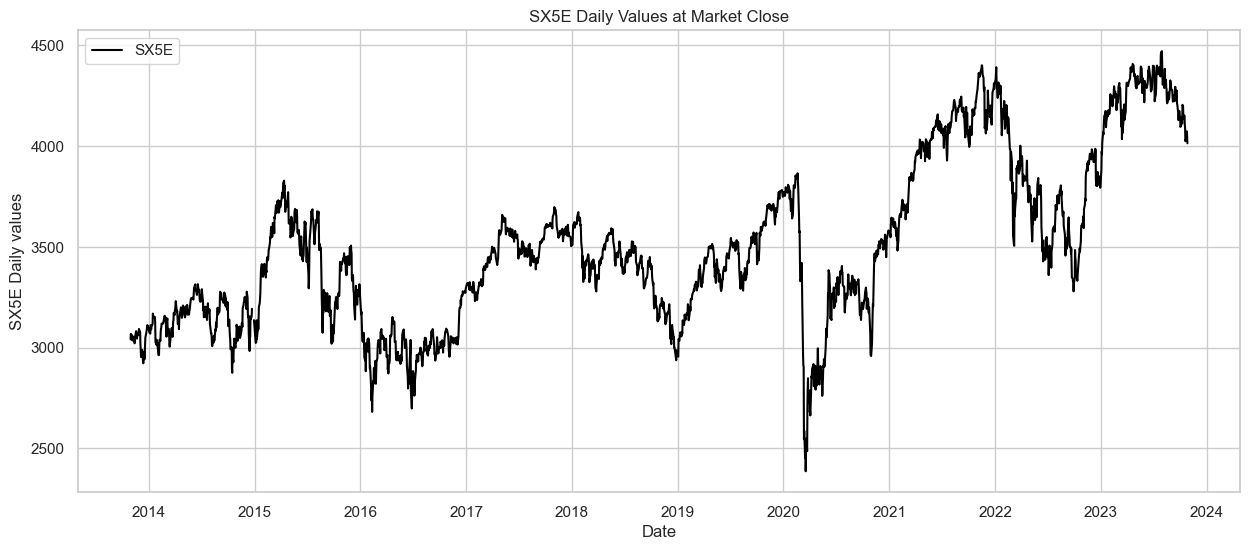

In [7]:
plt.figure(figsize=(15, 6))
Tempo = pd.to_datetime(data['Date'], format='%d/%m/%Y')
plt.plot(Tempo, data['Adj Close'], color='black', label= 'SX5E')

plt.title('SX5E Daily Values at Market Close')
plt.xlabel('Date')
plt.ylabel('SX5E Daily values')
plt.legend()

Mean of Log Returns (%): 0.011775216013590195
Standard Deviation of Log Returns (%): 1.2391431214786024
Skewness of Log Returns: -0.7954977033812863
Kurtosis of Log Returns: 10.255175332845548


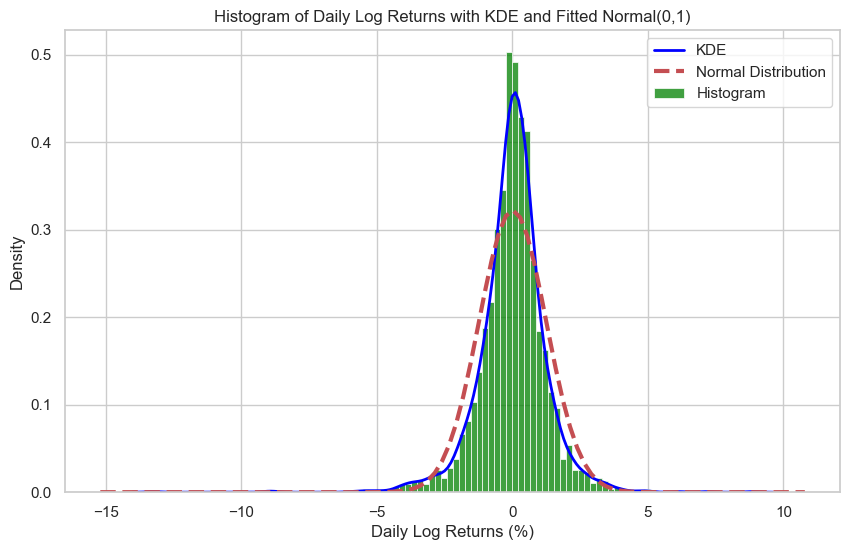

In [8]:
# Load the data
file_path = 'QRM-2024-cw1-data-a.csv'
data = pd.read_csv(file_path)

# Compute daily log returns in percentage
data['logreturn'] = np.log(data['Adj Close']).diff() * 100
log_returns = data['logreturn'].dropna()

# Calculate statistics
mean_lr = log_returns.mean()
std_lr = log_returns.std()
skew_lr = skew(log_returns)
kurt_lr = kurtosis(log_returns)


print(f"Mean of Log Returns (%): {mean_lr}")
print(f"Standard Deviation of Log Returns (%): {std_lr}")
print(f"Skewness of Log Returns: {skew_lr}")
print(f"Kurtosis of Log Returns: {kurt_lr}")


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(log_returns, bins=100, color='green', stat="density", label='Histogram')


sns.kdeplot(log_returns, color='blue', linewidth=2, label='KDE')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_lr, std_lr)
plt.plot(x, p, 'r--', linewidth=3, label='Normal Distribution')


plt.title('Histogram of Daily Log Returns with KDE and Fitted Normal(0,1)')
plt.xlabel('Daily Log Returns (%)')
plt.ylabel('Density')
plt.legend()


plt.show()


 Draw the empirical ACFs of the log returns, their absolute values, and their
 squares. What can you conclude?

<Figure size 800x400 with 0 Axes>

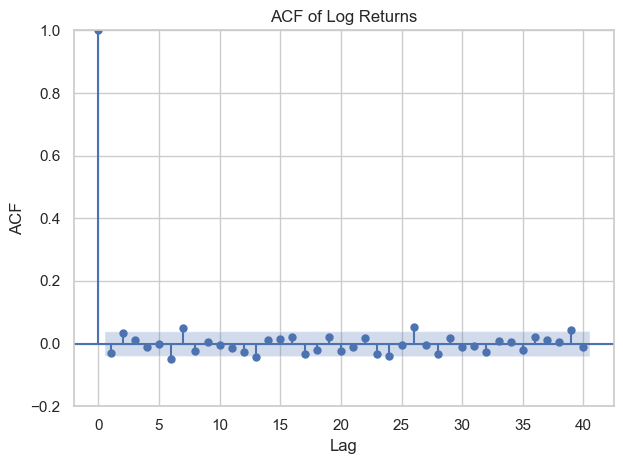

<Figure size 800x400 with 0 Axes>

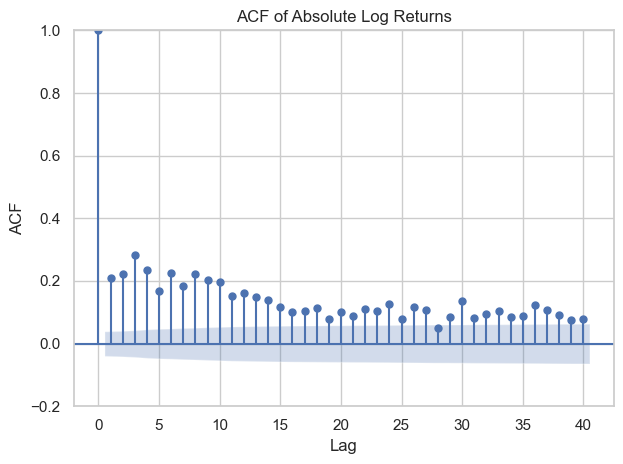

<Figure size 800x400 with 0 Axes>

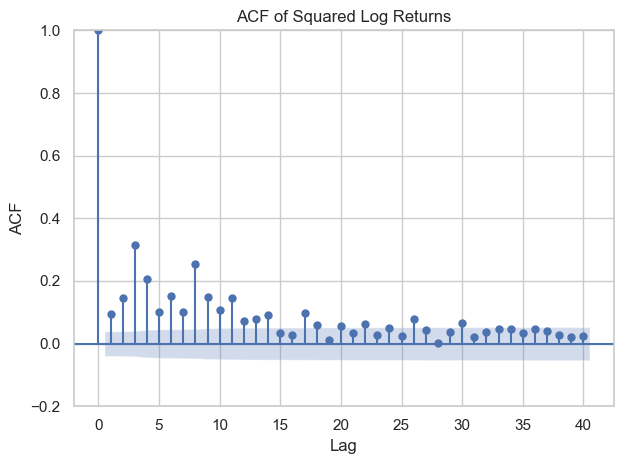

In [9]:

plt.figure(figsize=(8, 4))
plot_acf(log_returns, lags=40)
plt.title('ACF of Log Returns')
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.ylim(-0.2, 1)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 4))
plot_acf(np.abs(log_returns), lags=40)
plt.title('ACF of Absolute Log Returns')
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.ylim(-0.2, 1)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 4))
plot_acf(log_returns ** 2, lags=40)
plt.title('ACF of Squared Log Returns')
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.ylim(-0.2, 1)
plt.tight_layout()
plt.show()

 Fit a standard GARCH(1,1) model, with constant conditional mean and stan
dard normal innovations, to the log return data. Report the model fitting re
sults. Plot the absolute returns and fitted volatilities. Comment on the results.

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              logreturn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3738.92
Distribution:                  Normal   AIC:                           7485.84
Method:            Maximum Likelihood   BIC:                           7509.14
                                        No. Observations:                 2505
Date:                Sat, May 17 2025   Df Residuals:                     2504
Time:                        19:50:45   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0476  2.019e-02      2.360  1.830e-02 [8.

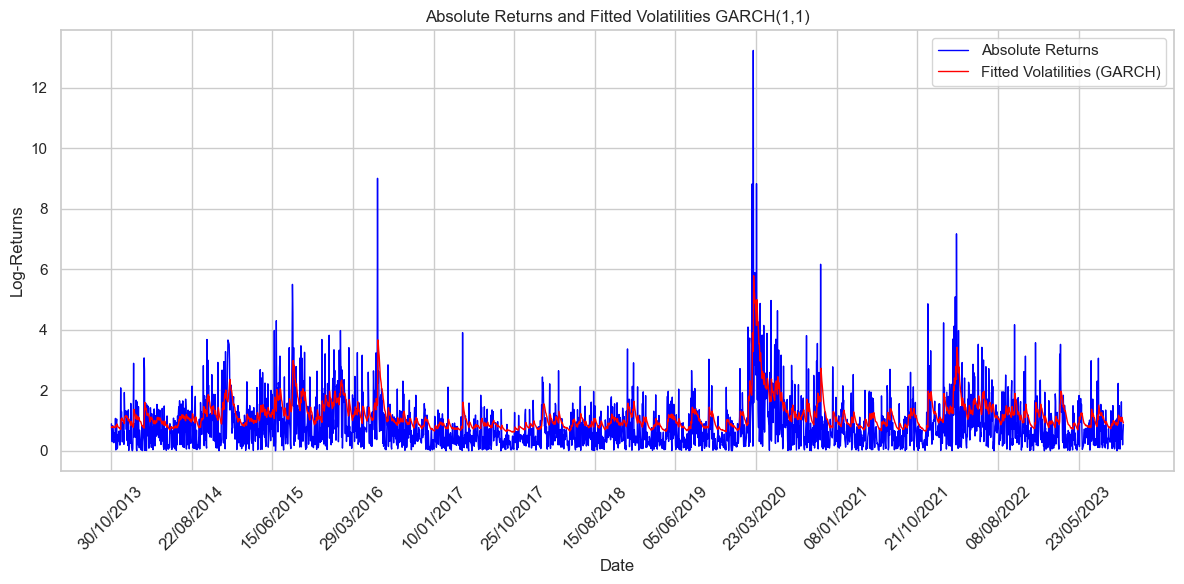

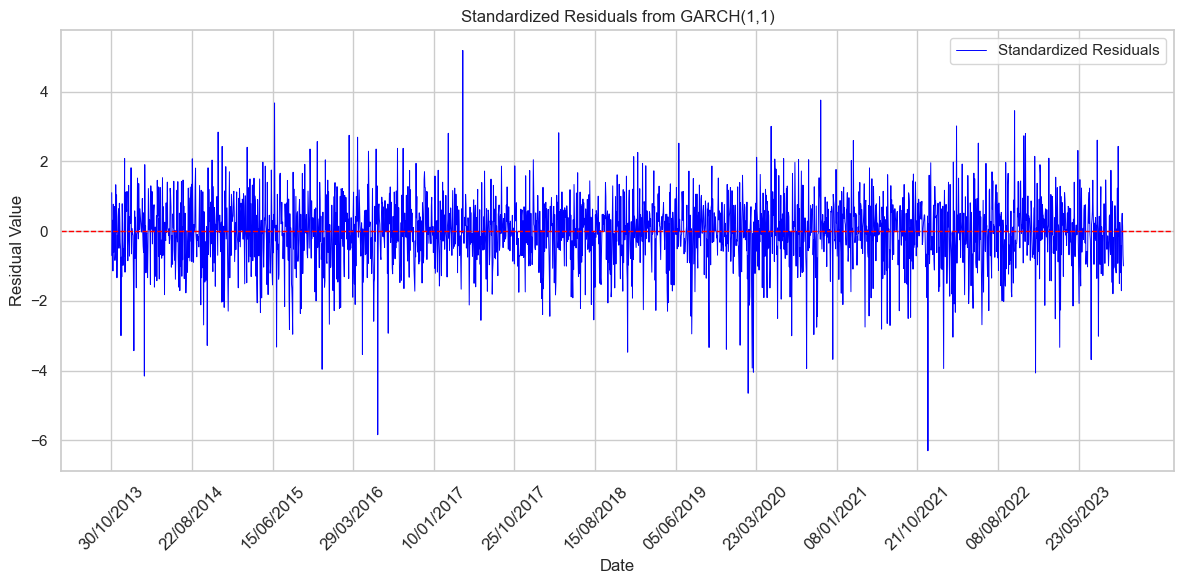

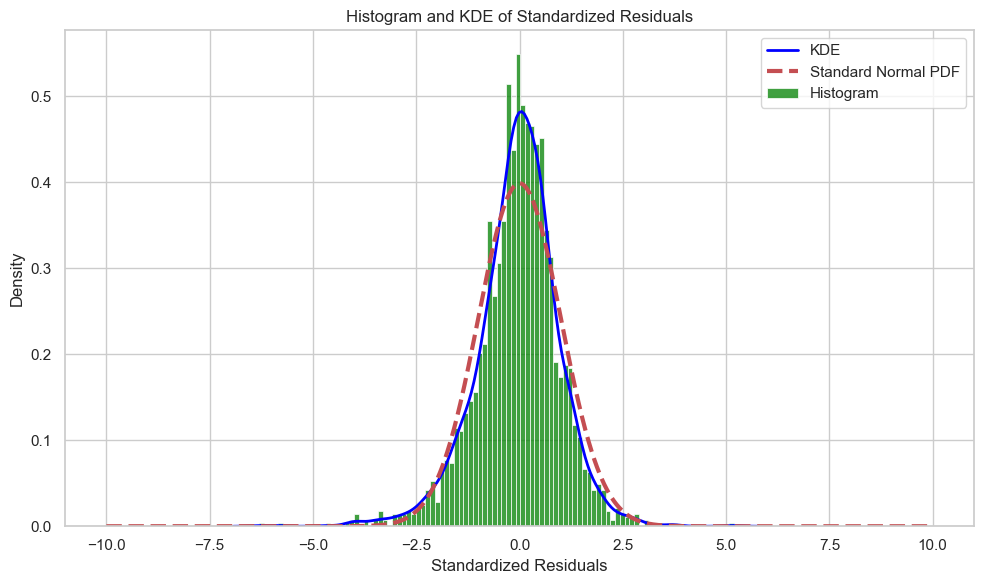

<Figure size 1000x600 with 0 Axes>

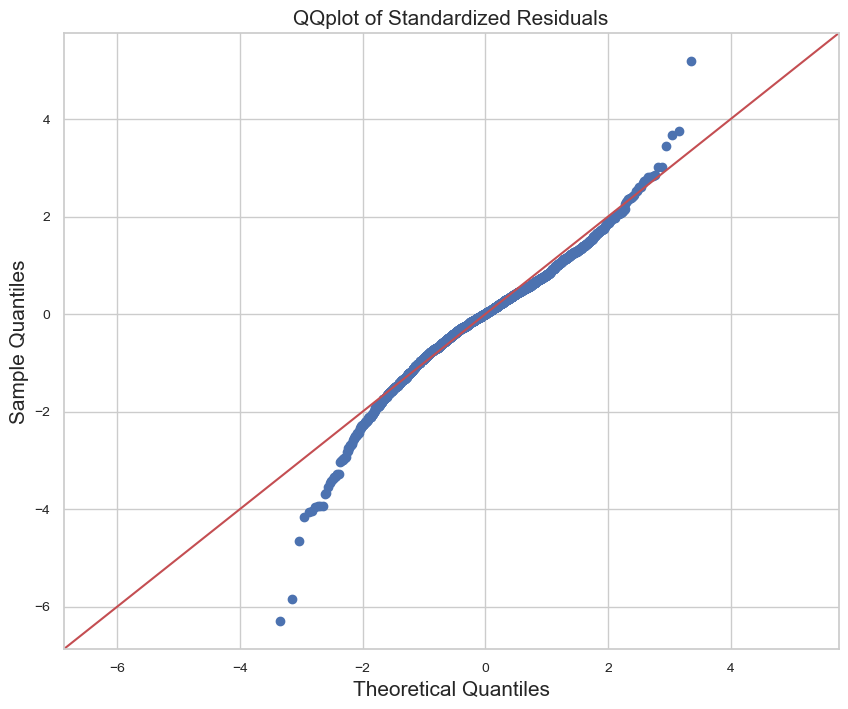

In [11]:


garch_model = arch_model(log_returns, vol='Garch', p=1, q=1, mean='Constant', dist='normal')
garch_fit = garch_model.fit(disp="off")


print(garch_fit.summary())


fitted_vol = garch_fit.conditional_volatility  # Fitted volatilities
std_resid = garch_fit.resid / fitted_vol       # Standardized residuals



plt.figure(figsize=(12, 6))
plt.plot(log_returns.index, np.abs(log_returns), label='Absolute Returns', color='blue', linewidth=1)
plt.plot(fitted_vol.index, fitted_vol, label='Fitted Volatilities (GARCH)', color='red', linewidth=1)
plt.title('Absolute Returns and Fitted Volatilities GARCH(1,1)')
plt.xlabel('Date')
plt.ylabel('Log-Returns')
plt.xticks(
    range(0, len(data), 200),
    labels=data['Date'][0::200],
    size=12,
    rotation=45
)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(std_resid, label='Standardized Residuals', color='blue', linewidth=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Standardized Residuals from GARCH(1,1)')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.xticks(
    range(0, len(data), 200),
    labels=data['Date'][0::200],
    size=12,
    rotation=45
)
plt.legend()
plt.tight_layout()
plt.show()



sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(std_resid, bins=100, color='green', stat="density", label='Histogram')
sns.kdeplot(std_resid, color='blue', linewidth=2, label='KDE')

xmin, xmax = plt.xlim()
x = np.linspace(-10, 10, 1000)
p = norm.pdf(x, 0, 1)
plt.plot(x, p, 'r--', linewidth=3, label='Standard Normal PDF')

plt.title('Histogram and KDE of Standardized Residuals')
plt.xlabel('Standardized Residuals')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))

fig, ax = plt.subplots(figsize=(10, 8))
sm.qqplot(std_resid, line='45',ax=ax)
plt.title("QQplot of Standardized Residuals",size=15)
plt.xlabel("Theoretical Quantiles",size=15)
plt.ylabel("Sample Quantiles",size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

Assess the goodness of fit of the model estimated in(iii). Do the standardised
 residuals look like an iid sample from the standard normal distribution?

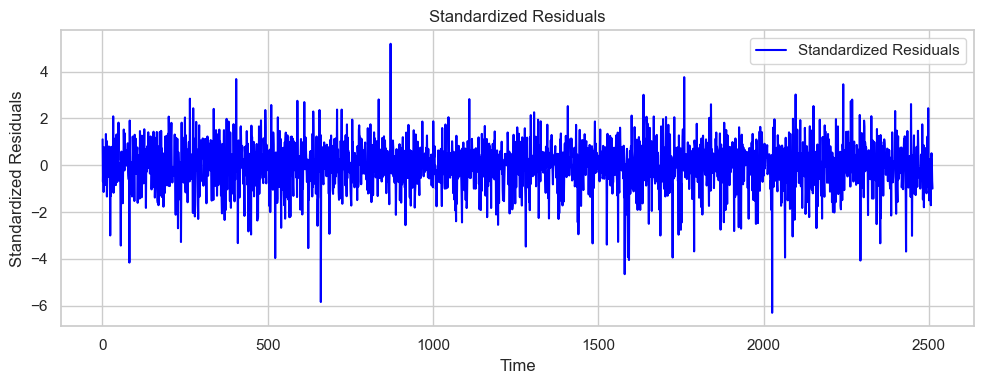

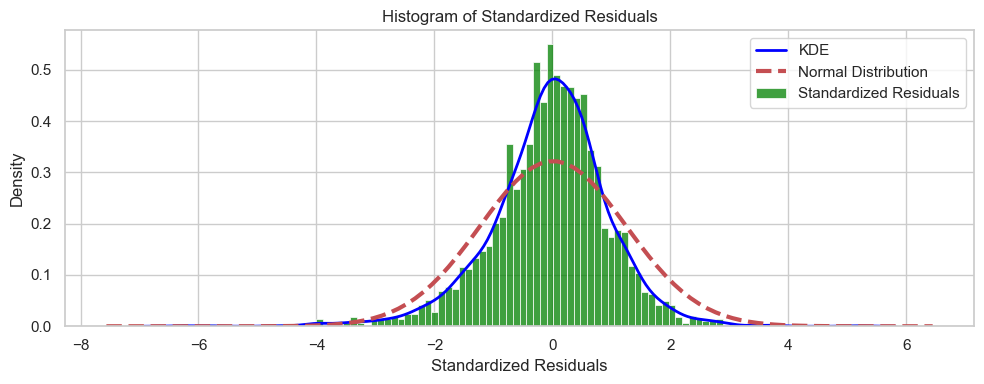

<Figure size 600x600 with 0 Axes>

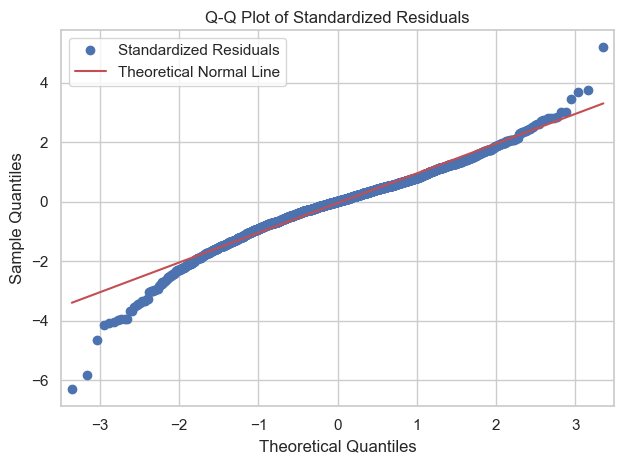

<Figure size 1000x400 with 0 Axes>

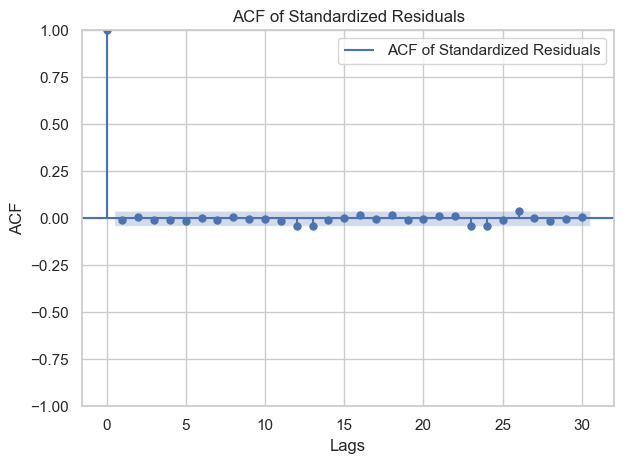

<Figure size 1000x400 with 0 Axes>

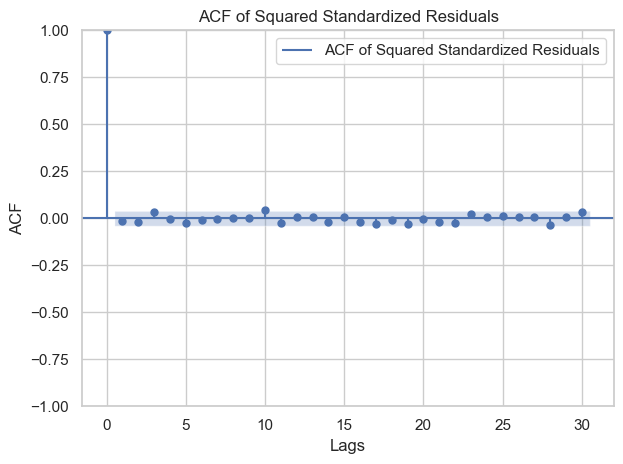

<Figure size 1000x400 with 0 Axes>

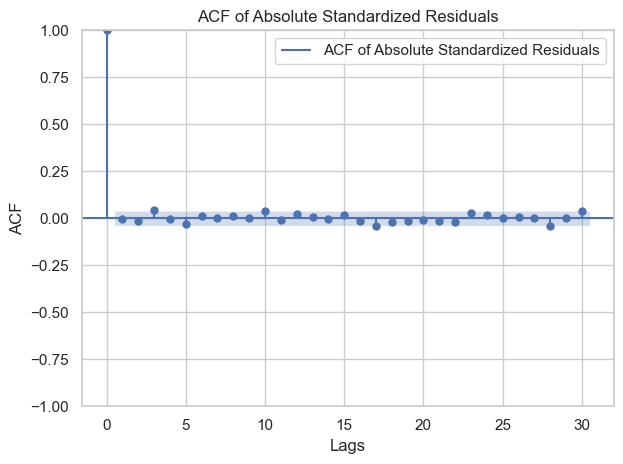

In [12]:

standardized_residuals = garch_fit.resid / garch_fit.conditional_volatility


plt.figure(figsize=(10, 4))
plt.plot(standardized_residuals, color='blue', label='Standardized Residuals')
plt.title('Standardized Residuals')
plt.xlabel('Time')
plt.ylabel('Standardized Residuals')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(standardized_residuals, bins=100, color='green', stat='density', label='Standardized Residuals')
sns.kdeplot(standardized_residuals, color='blue', linewidth=2, label='KDE')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_lr, std_lr)
plt.plot(x, p, 'r--', linewidth=3, label='Normal Distribution')
plt.title('Histogram of Standardized Residuals')
plt.xlabel('Standardized Residuals')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 6))
sm.qqplot(standardized_residuals, line='s')
plt.title('Q-Q Plot of Standardized Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.legend(['Standardized Residuals', 'Theoretical Normal Line'])
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plot_acf(standardized_residuals, lags=30)
plt.title('ACF of Standardized Residuals')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.legend(['ACF of Standardized Residuals'])
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plot_acf(standardized_residuals**2, lags=30)
plt.title('ACF of Squared Standardized Residuals')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.legend(['ACF of Squared Standardized Residuals'])
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 4))
plot_acf(np.abs(standardized_residuals), lags=30)
plt.title('ACF of Absolute Standardized Residuals')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.legend(['ACF of Absolute Standardized Residuals'])
plt.tight_layout()
plt.show()

GARCH(1,1)-ARMA(1,1)-Student-t

In [13]:



def arma11_garch11_t_loglikelihood(alpha0, alpha1, beta1, arma_mu, phi1, theta1, nu, x):

    # store time series of sigma_t^2 and mu_t
    var = np.zeros_like(x)
    mu = np.zeros_like(x)

    # set up proxies for sigma_0^2 and \mu_0
    var[0] = np.var(x, ddof=1) # sample variance
    mu[0] = np.mean(x) # sample mean

    # iterate over the ARMA(1,1)-GARCH(1,1) dynamics
    for i in range(1, len(x)):
        mu[i] = arma_mu + phi1 * (x.iloc[i-1] - arma_mu) + theta1 * (x.iloc[i-1] - mu[i-1])
        var[i] = alpha0 + alpha1 * (x.iloc[i-1] - mu[i-1])**2 + beta1 * var[i-1]

    return np.sum(-0.5*np.log(var[1:]) + np.log(t.pdf((x.iloc[1:]-mu[1:])/np.sqrt(var[1:]), nu, 0, np.sqrt((nu-2)/nu))))

In [14]:
objfun_armagarch_t = lambda y : -1 * arma11_garch11_t_loglikelihood(y[0], y[1], y[2], y[3], y[4], y[5], y[6], log_returns)
constraint = lambda y :  1 - y[1] - y[2]

y0 = [1, 0.1, 0.1, 0, 0, 0, 10]
print("Initial objective function value: " + str(objfun_armagarch_t(y0)))

bnds = ((0,np.inf), (0,1), (0,1), (-np.inf, np.inf), (-np.inf, np.inf), (-np.inf, np.inf), (2.01, np.inf))

con = {'type': 'ineq', 'fun': constraint}

sol = minimize(objfun_armagarch_t,y0, method='SLSQP',bounds=bnds,constraints=con, options={'disp': True})

print("Estimate of alpha0: " + str(sol.x[0]))
print("Estimate of alpha1: " + str(sol.x[1]))
print("Estimate of beta1: " + str(sol.x[2]))
print("Estimate of mu: " + str(sol.x[3]))
print("Estimate of phi1: " + str(sol.x[4]))
print("Estimate of theta1: " + str(sol.x[5]))
print("Estimate of nu: " + str(sol.x[6]))

Initial objective function value: 3828.5397544425814
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3635.0922425801496
            Iterations: 35
            Function evaluations: 311
            Gradient evaluations: 34
Estimate of alpha0: 0.047456242008100086
Estimate of alpha1: 0.14768174504878487
Estimate of beta1: 0.8335484349115174
Estimate of mu: 0.06985516437644283
Estimate of phi1: 0.911435166815261
Estimate of theta1: -0.9335259832504165
Estimate of nu: 4.727062738456344


In [15]:
#first calculate the fitted values
fitted_mu=np.zeros_like(log_returns)
fitted_mu[0]=np.mean(log_returns)
fitted_var=np.zeros_like(log_returns)
fitted_var[0]=np.var(log_returns,ddof=1)
for i in range(1,len(log_returns)):
    fitted_mu[i]=sol.x[3]+sol.x[4]*(log_returns.iloc[i-1]-sol.x[3])+sol.x[5]*(log_returns.iloc[i-1]-fitted_mu[i-1])
    fitted_var[i]=sol.x[0]+sol.x[1]*(log_returns.iloc[i-1]-fitted_mu[i-1])**2+sol.x[2]*fitted_var[i-1]

In [16]:
volatilities=np.sqrt(fitted_var)

Text(0, 0.5, 'Log-Returns')

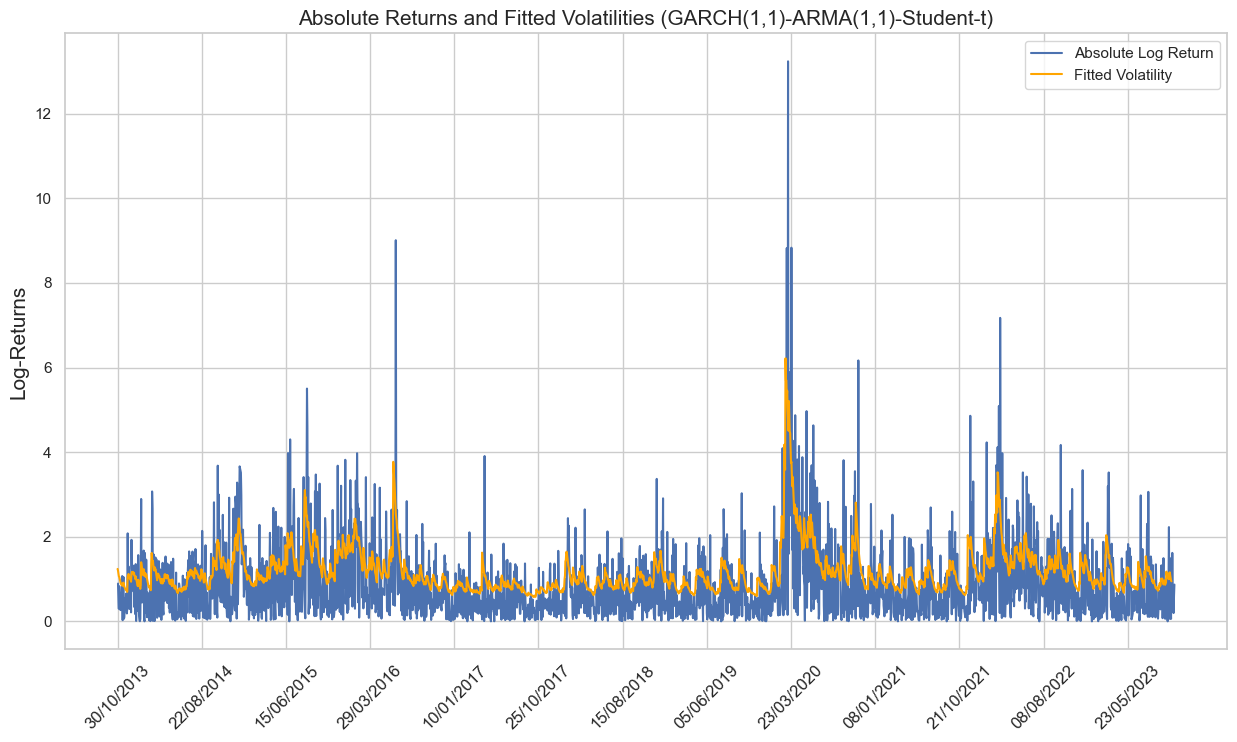

In [17]:
plt.figure(figsize=(15,8))
sns.lineplot(np.abs(log_returns) , label='Absolute Log Return')
sns.lineplot(volatilities, color='orange', label='Fitted Volatility')
plt.title("Absolute Returns and Fitted Volatilities (GARCH(1,1)-ARMA(1,1)-Student-t)",size=15)
plt.xticks(range(0,len(log_returns),200),labels=data['Date'][0::200],size=12,rotation=45)
plt.ylabel("Log-Returns",size=15)

(array([-15., -10.,  -5.,   0.,   5.,  10.]),
 [Text(0, -15.0, '−15'),
  Text(0, -10.0, '−10'),
  Text(0, -5.0, '−5'),
  Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10')])

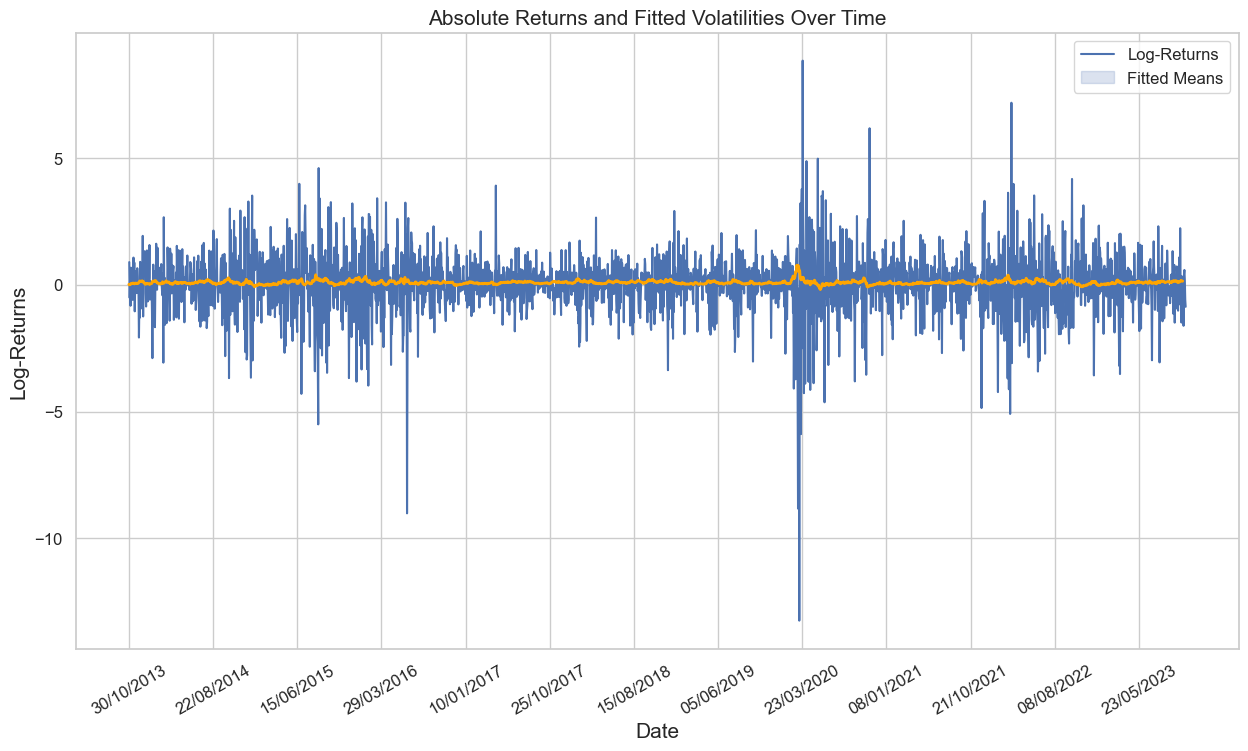

In [18]:
plt.figure(figsize=(15,8))
#Create a dataframe with two columns of abs return and fitted volatilities
sns.lineplot(log_returns)
sns.lineplot(fitted_mu,color="orange",linewidth=2)
plt.title("Absolute Returns and Fitted Volatilities Over Time",size=15)
plt.xlabel("Date",size=15)
plt.ylabel("Log-Returns",size=15)
plt.legend(labels=["Log-Returns","Fitted Means"],prop={'size': 12})
plt.xticks(range(0,len(log_returns),200),labels=data['Date'][0::200],size=12,rotation=30)
plt.yticks(size=12)

Standardized residual mean: -0.07706923390451895
Standardized residual std: 0.9835345507383875
(4.858701071615758, -0.02794377952366803, 0.7629980074432204)


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6')])

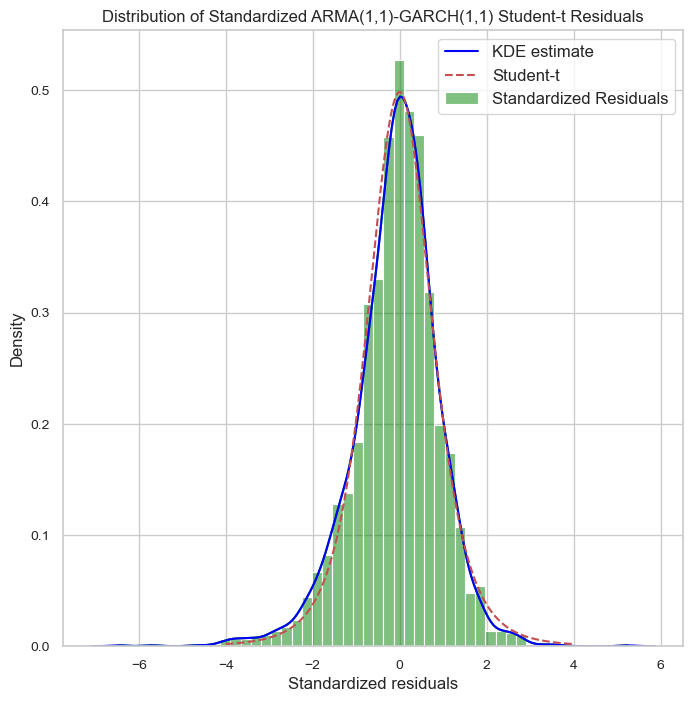

In [19]:
plt.figure(figsize=(8,8))
standardized_residualsAG=(log_returns-fitted_mu)/volatilities
print("Standardized residual mean: "+str(np.mean(standardized_residualsAG)))
print("Standardized residual std: "+str(np.std(standardized_residualsAG)))
nu=sol.x[6]
scale=np.sqrt((nu-2)/nu)   ### What does scale stands for?
t_x=np.linspace(-4,4,len(log_returns))
sns_ax=sns.histplot(data=standardized_residualsAG, bins=50, stat="density",color="green",  kde=True, label="Standardized Residuals")
sns.kdeplot(standardized_residualsAG,color="blue",label="KDE estimate")
print(t.fit(standardized_residualsAG))
sns_ax.plot(t_x,t.pdf(t_x,df=nu,scale=scale), 'r--',label="Student-t")
plt.xlabel("Standardized residuals",size=12)
plt.ylabel("Density",size=12)
plt.title("Distribution of Standardized ARMA(1,1)-GARCH(1,1) Student-t Residuals")#,size=15)
plt.legend(prop={'size': 12})
plt.xticks(size=10)
plt.yticks(size=10)

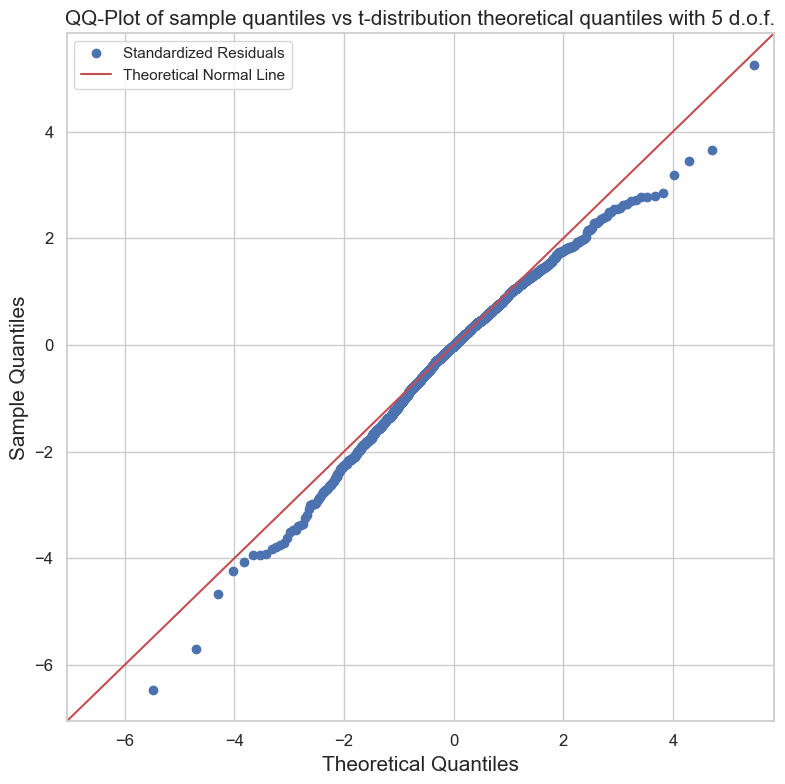

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))
sm.qqplot(standardized_residualsAG,dist=t,distargs=([5]),scale=scale,line='45',ax=ax)
plt.title("QQ-Plot of sample quantiles vs t-distribution theoretical quantiles with 5 d.o.f.",size=15)
plt.ylabel("Sample Quantiles",size=15)
plt.xlabel("Theoretical Quantiles", size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(['Standardized Residuals', 'Theoretical Normal Line'])
plt.tight_layout()
plt.show()

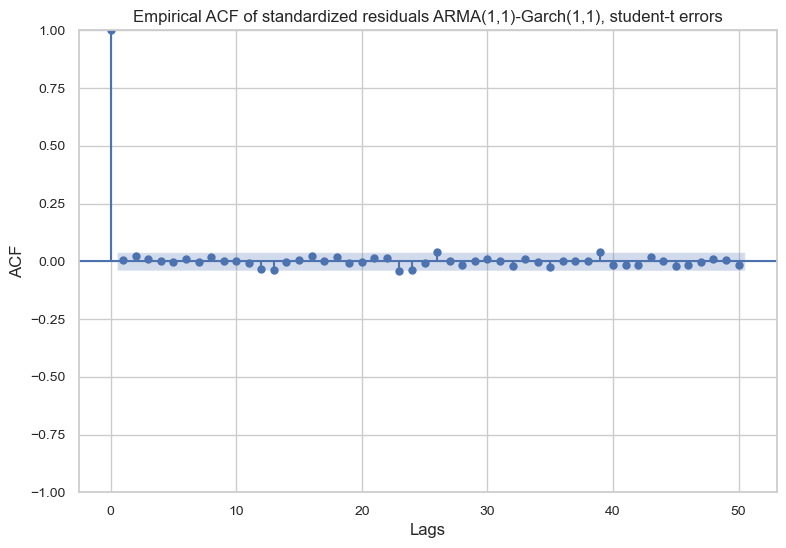

In [21]:
fig, ax = plt.subplots(figsize=(9, 6))
plot_acf(standardized_residualsAG,lags=50,title="Empirical ACF of standardized residuals ARMA(1,1)-Garch(1,1), student t errors",ax=ax)

plt.ylabel("ACF",size=12)
plt.title("Empirical ACF of standardized residuals ARMA(1,1)-Garch(1,1), student-t errors",size=12)
plt.ylabel("ACF",size=12)
plt.xlabel("Lags",size=12)
plt.yticks(size=10)
plt.xticks(size=10)
plt.show()

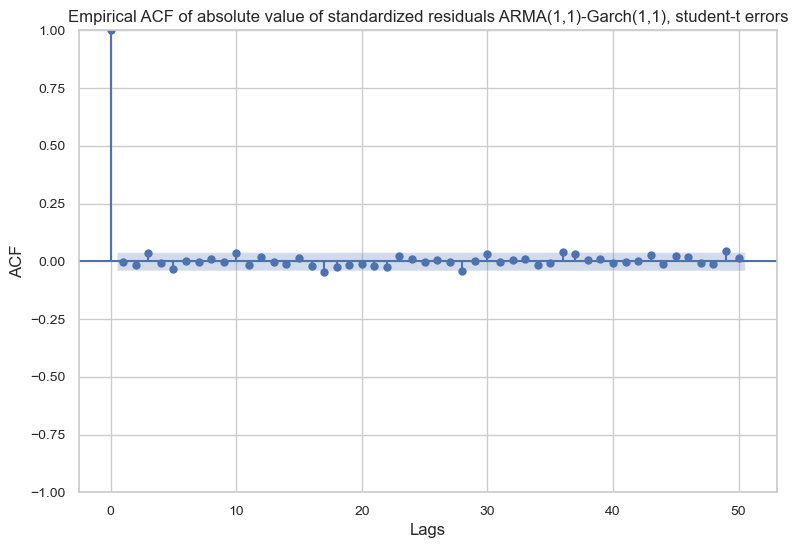

In [22]:
fig, ax = plt.subplots(figsize=(9, 6))
plot_acf(np.abs(standardized_residualsAG),lags=50,title="Empirical ACF of standardized residuals ARMA(1,1)-Garch(1,1), student t errors",ax=ax)
plt.title("Empirical ACF of absolute value of standardized residuals ARMA(1,1)-Garch(1,1), student-t errors")#,size=12)
plt.ylabel("ACF")#,size=12)
plt.xlabel("Lags")#,size=12)
plt.yticks(size=10)
plt.xticks(size=10)

plt.show()

GARCH(1,1)-Student-t

In [23]:
#Plotting with GARCH(1,1) with student-t
def garch11_t_loglikelihood(mu, alpha0, alpha1, beta1, nu, x):

    var = np.zeros_like(x)

    # We need a proxy for sigma_0^2. Let's take it as the sample variance of the data X
    var[0] = np.var(x, ddof=1)

    # Get all the conditional variance values from the GARCH dynamics
    for i in range(1, len(x)):
        var[i] = alpha0 + alpha1 * (x.iloc[i-1]-mu)**2 + beta1 * var[i-1]

    return np.sum(-0.5*np.log(var[1:]) + np.log(t.pdf((x.iloc[1:]-mu)/np.sqrt(var[1:]), nu, 0, np.sqrt((nu-2)/nu))))

In [24]:
objfun_t = lambda y : -1 * garch11_t_loglikelihood(y[0], y[1], y[2], y[3], y[4], log_returns)
constraint = lambda y :  1 - y[1] - y[2]

y0 = [np.mean(log_returns),1, 0.1, 0.1, 10]
print("Initial objective function value: " + str(objfun_t(y0)))

bnds = ((-np.inf,np.inf), (0,np.inf), (0,1), (0,1), (2.01, np.inf))

con = {'type': 'ineq', 'fun': constraint}

sol = minimize(objfun_t,y0,method='SLSQP',bounds=bnds,constraints=con, options={'disp': True})

print("Estimate of alpha0: " + str(sol.x[1]))
print("Estimate of alpha1: " + str(sol.x[2]))
print("Estimate of beta1: " + str(sol.x[3]))
print("Estimate of nu: " + str(sol.x[4]))
print("Estimate of mu: "+str(sol.x[0]))

Initial objective function value: 3827.498783758821
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3639.0657088128064
            Iterations: 29
            Function evaluations: 196
            Gradient evaluations: 29
Estimate of alpha0: 0.04723720099885733
Estimate of alpha1: 0.148063913409995
Estimate of beta1: 0.8331367704706079
Estimate of nu: 4.786067763291391
Estimate of mu: 0.06816212117827083


Standardized residual mean: -0.07706923390451895
Standardized residual std: 0.9835345507383875


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6')])

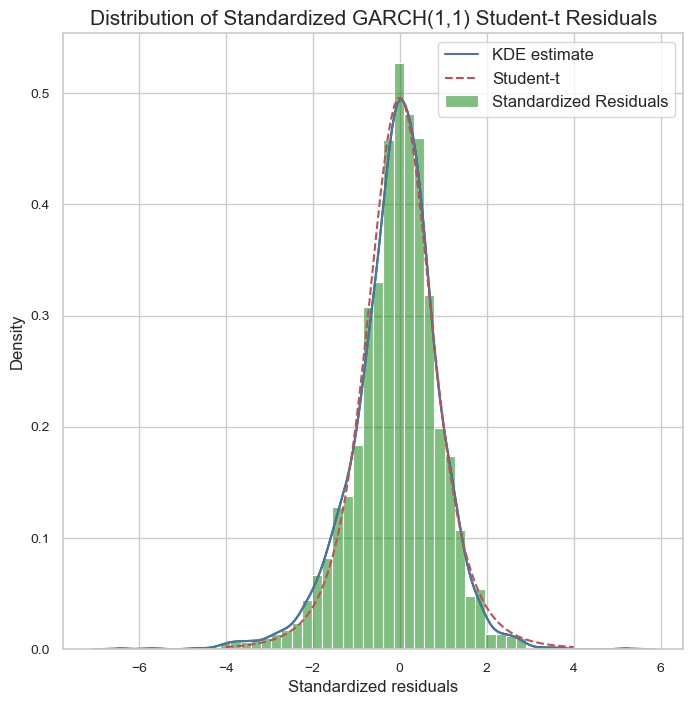

In [25]:
plt.figure(figsize=(8,8))
standardized_residualsT=(log_returns-fitted_mu)/volatilities
print("Standardized residual mean: "+str(np.mean(standardized_residualsT)))
print("Standardized residual std: "+str(np.std(standardized_residualsT)))
nu=sol.x[4]
scale=np.sqrt((nu-2)/nu)
t_x=np.linspace(-4,4,len(x))
sns_ax=sns.histplot(data=standardized_residualsT, bins=50, stat="density", color="green", kde=True, label="Standardized Residuals")
sns.kdeplot(standardized_residualsT,label="KDE estimate")
sns_ax.plot(t_x,t.pdf(t_x,df=nu,scale=scale),'r--',label="Student-t")
plt.xlabel("Standardized residuals",size=12)
plt.ylabel("Density",size=12)
plt.title("Distribution of Standardized GARCH(1,1) Student-t Residuals",size=15)
plt.legend(prop={'size': 12})
plt.xticks(size=10)
plt.yticks(size=10)

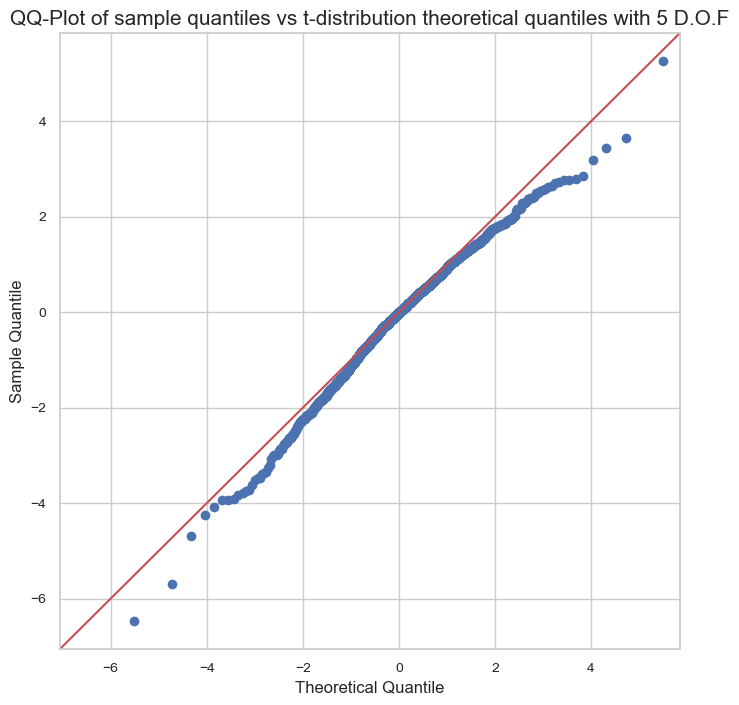

In [26]:
fig, ax = plt.subplots(figsize=(8, 8))
sm.qqplot(standardized_residualsT,dist=t,distargs=([5]),scale=scale,line='45',ax=ax)
plt.title("QQ-Plot of sample quantiles vs t-distribution theoretical quantiles with 5 D.O.F",size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel("Theoretical Quantile",size=12)
plt.ylabel("Sample Quantile",size=12)
plt.show()

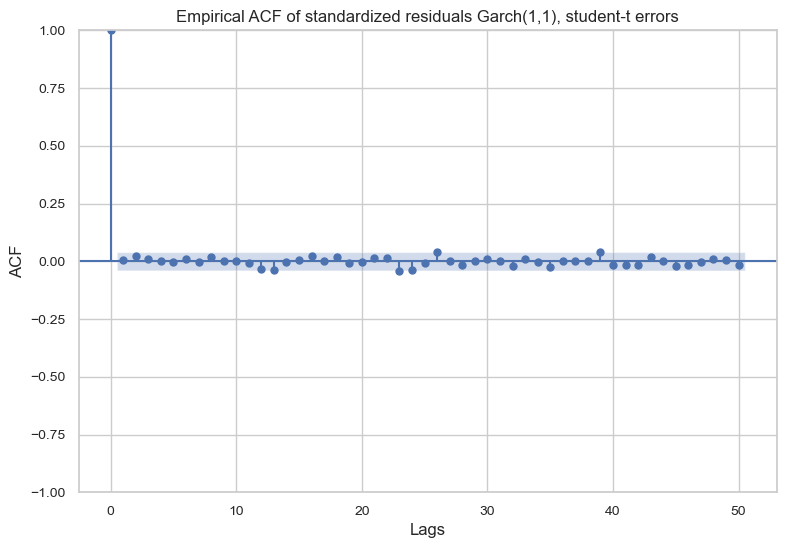

In [27]:
fig, ax = plt.subplots(figsize=(9, 6))
sm.graphics.tsa.plot_acf(standardized_residualsT,lags=50,title="Empirical ACF of standardized residuals Garch(1,1), student t errors",ax=ax)
plt.ylabel("ACF",size=12)
plt.title("Empirical ACF of standardized residuals Garch(1,1), student-t errors",size=12)
plt.xlabel("Lags",size=12)
plt.yticks(size=10)
plt.xticks(size=10)
plt.show()

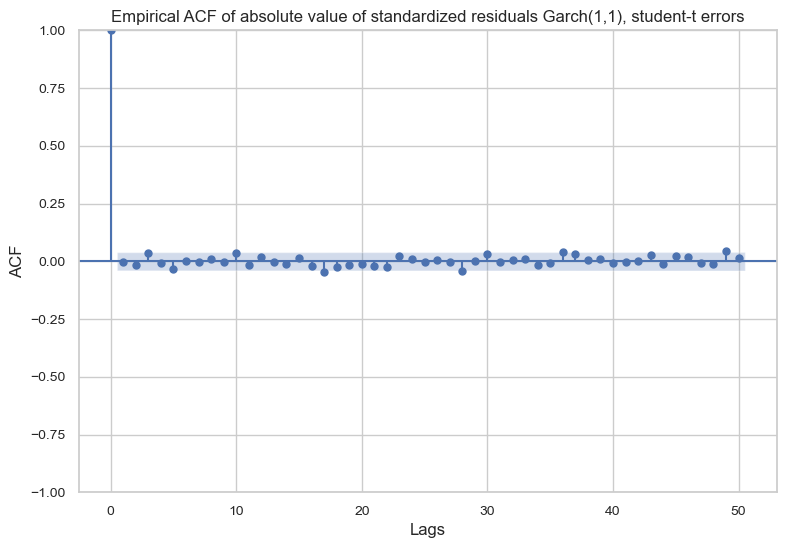

In [28]:
fig, ax = plt.subplots(figsize=(9, 6))
sm.graphics.tsa.plot_acf(np.abs(standardized_residualsT),lags=50,title="Empirical ACF of standardized residuals Garch(1,1), student t errors",ax=ax)
plt.title("Empirical ACF of absolute value of standardized residuals Garch(1,1), student-t errors",size=12)
plt.xlabel("Lags",size=12)
plt.ylabel("ACF",size=12)
plt.yticks(size=10)
plt.xticks(size=10)
plt.show()

# Q2

In [29]:
df = pd.read_csv("QRM-2024-cw1-data-b.csv")
df.rename(columns={"Date": "date", "Adj Close": "adj_close"}, inplace=True)

Daily simple returns are given by $$R_t:=\frac{S_t-S_{t-1}}{S_{t-1}},$$ which can through computed by the Pandas function `pct_change()`. The log returns are given by $$r_t:=\ln S_t - \ln S_{t-1}=\ln(1+R_t).$$ <br>
Moreover, the daily linearised loss is defined as: $$ \bar L_{t+1}^{\Delta} = \frac{L_{t+1}^{\Delta} }{V_t} = -{r_{t+1}}$$

In [30]:
df['simple_return'] = df['adj_close'].pct_change()
df['log_return'] = np.log(1+ df['simple_return'])
df['linearised_loss'] = -df['log_return']
df['date'] = pd.to_datetime(df['date'])

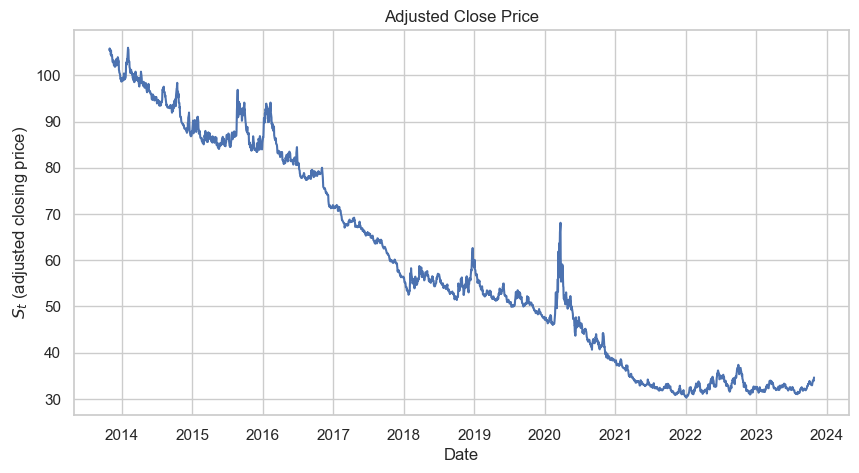

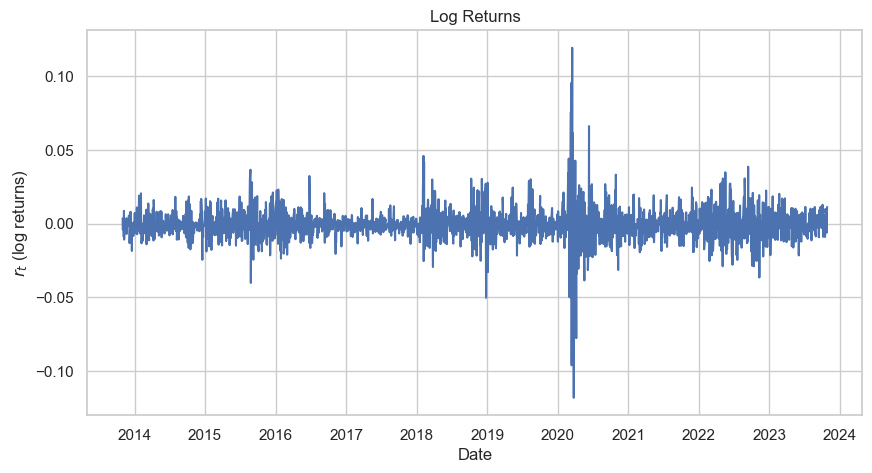

In [31]:
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(df['date'],df['adj_close'])
plt.title('Adjusted Close Price')
plt.ylabel(r"$S_t$ (adjusted closing price)")
plt.xlabel('Date')
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(df['date'],df['log_return'])
plt.title('Log Returns')
plt.ylabel(r"$r_t$ (log returns)")
plt.xlabel('Date')
plt.show()

## a. Historical Simulations

In forecasting, we use a *rolling window* scheme: For each $t$, we forecast the distribution of $\bar{L}^{\Delta}_{t+1}$ based on the $ N $ previous losses

$ \bar{L}^{\Delta}_{t-(N-1)}, \dots, \bar{L}^{\Delta}_{t-1}, \bar{L}^{\Delta}_t. $

We set $N = 500$, which corresponds to roughly *two years*.

Let $\hat{q}_{\alpha}$ be the *empirical* $\alpha$-quantile of the sample $\bar{L}^{\Delta}_{t-(N-1)}, \dots, \bar{L}^{\Delta}_{t-1}, \bar{L}^{\Delta}_t$. We forecast VaR by

$\widehat{\text{VaR}}_{\alpha} (\bar{L}^{\Delta}_{t+1}) := \hat{q}_{\alpha}.$

In [32]:
N = 500
alpha_95 = 0.95
alpha_99 = 0.99

In [33]:
def compute_var_es_HS(N, alpha, df):
    df[f"var_HS_{alpha}"] = np.nan
    df[f"es_HS_{alpha}"] = np.nan
    for t in range(N, df.shape[0]):
        # Define the rolling window
        window = df.loc[t-N:t-1, 'linearised_loss']
        # Compute the empirical alpha quantile (VaR) within that window and set it in the dataset
        var_alpha = window.quantile(alpha)
        df.at[t, f"var_HS_{alpha}"] = var_alpha
        # Find the violations
        violations = window[window >= var_alpha]
        # Find the number of violations
        m_t_alpha = len(violations)
        if m_t_alpha > 0:
            es_alpha = violations.mean()
        else:
            es_alpha = 0
        df.at[t, f"es_HS_{alpha}"] = es_alpha

In [34]:
compute_var_es_HS(N,alpha_95,df)
compute_var_es_HS(N, alpha_99,df)

In [35]:
df['positive_portfolio_loss'] = df['linearised_loss'].apply(lambda x: x if x >= 0 else 0)

In [36]:
df["violations_HS_0.95"] = (df["linearised_loss"] > df["var_HS_0.95"]).astype(int)
df["violations_HS_0.99"] = (df["linearised_loss"] > df["var_HS_0.99"]).astype(int)

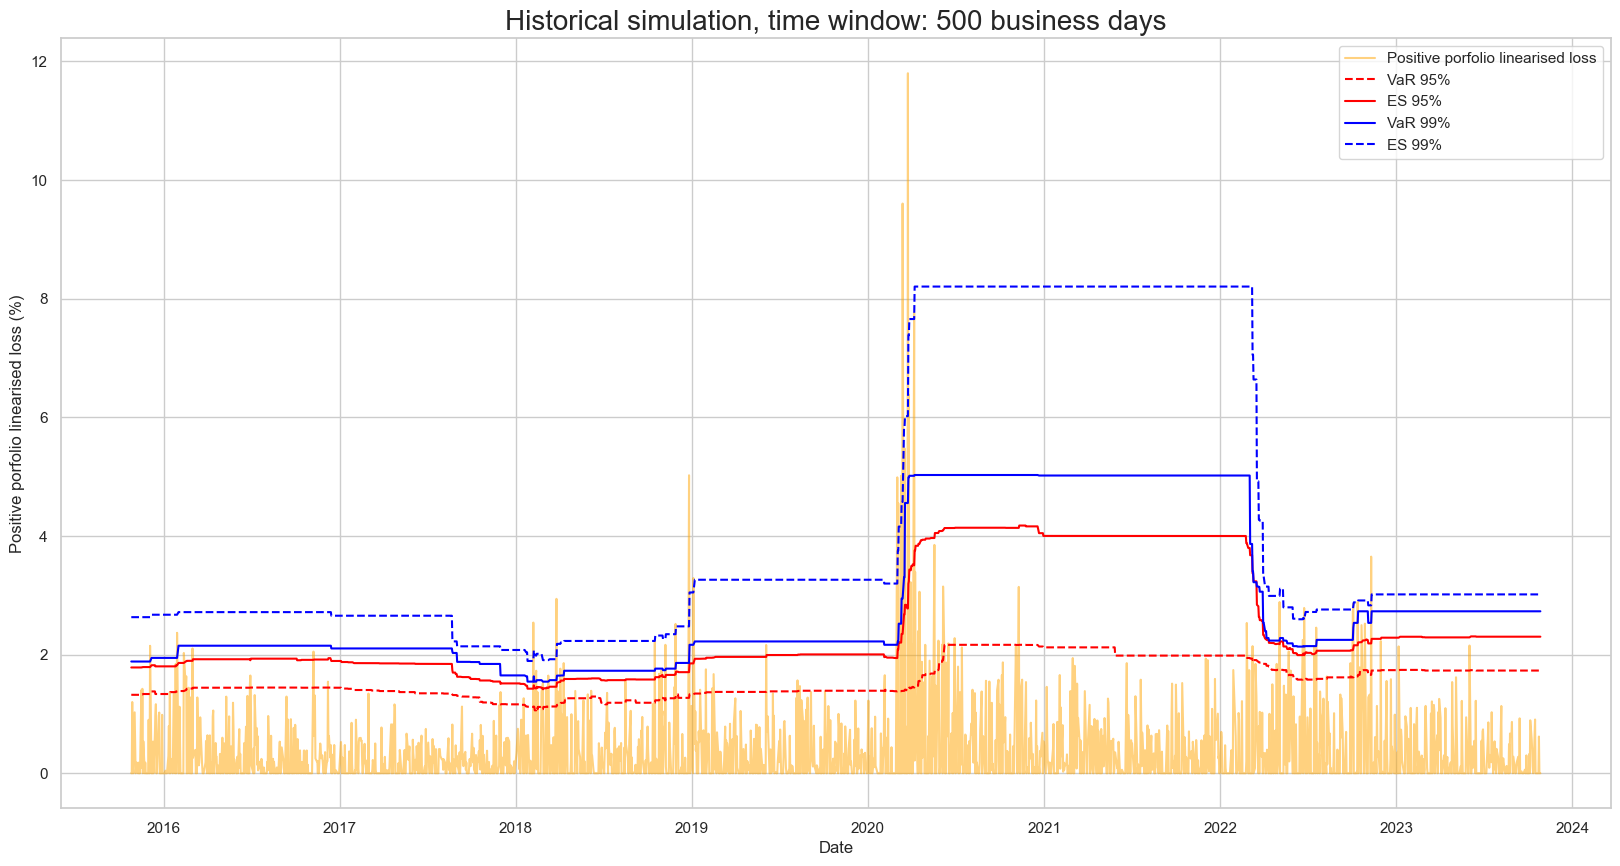

In [37]:
plt.figure(figsize=(20, 10))
plt.plot(df['date'].iloc[500:], df['positive_portfolio_loss'].iloc[500:]*100, label='Positive porfolio linearised loss', alpha=0.5, color = 'orange')
plt.plot(df['date'], df[f"var_HS_0.95"]*100, label=f'VaR 95%', color='red', linestyle = "--")
plt.plot(df['date'], df[f"es_HS_0.95"]*100, label=f'ES 95%', color='red')
plt.plot(df['date'], df[f"var_HS_0.99"]*100, label=f'VaR 99%', color='blue')
plt.plot(df['date'], df[f"es_HS_0.99"]*100, label=f'ES 99%', color='blue', linestyle = "--")
plt.xlabel("Date")
plt.ylabel("Positive porfolio linearised loss (%)")
plt.title("Historical simulation, time window: 500 business days", fontsize=20)
plt.legend()


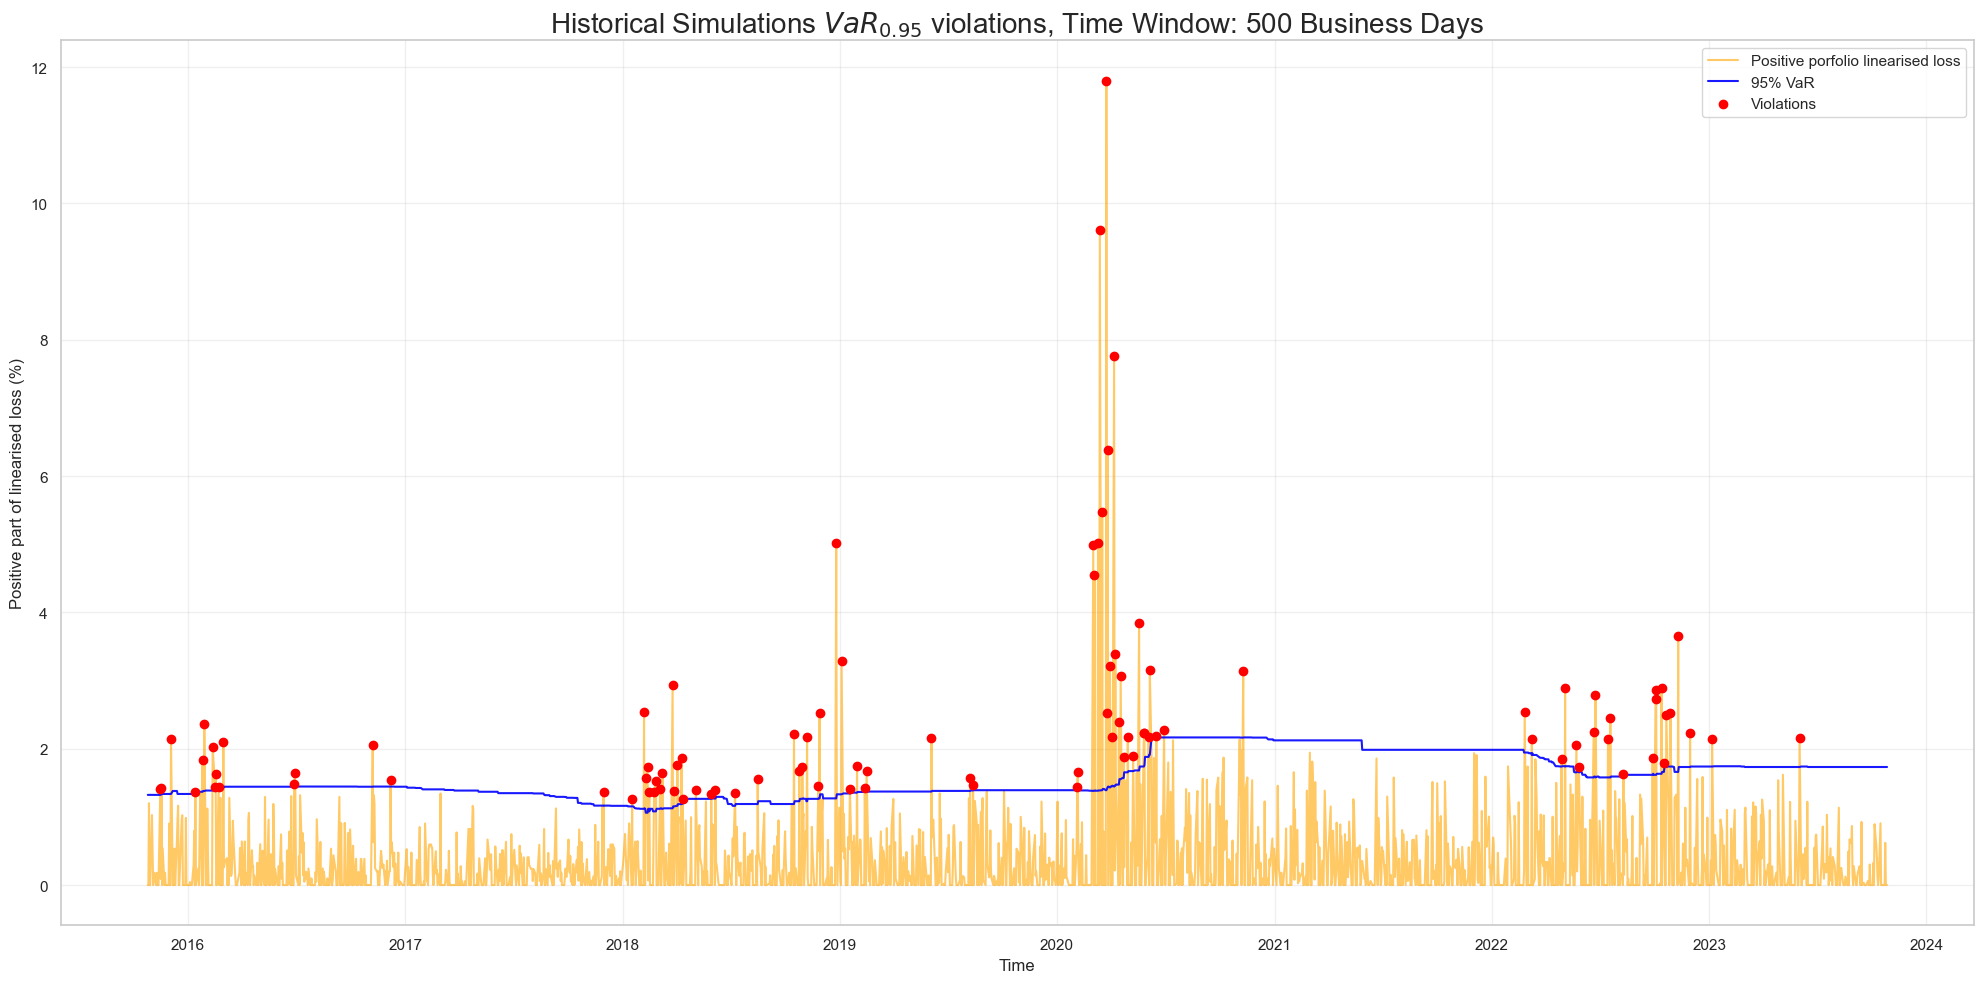

In [38]:
plt.figure(figsize=(20, 10))
plt.plot(df["date"].iloc[500:], df["positive_portfolio_loss"].iloc[500:]*100, label='Positive porfolio linearised loss', color="orange", alpha=0.6)
plt.plot(df["date"].iloc[500:], df["var_HS_0.95"].iloc[500:]*100, label="95% VaR", color="blue", alpha=0.9)

violations = df[df["violations_HS_0.95"]  == 1]
plt.scatter(violations["date"], violations["linearised_loss"]*100, color="red", label="Violations", zorder=5)

plt.title("Historical Simulations $VaR_{0.95}$ violations, Time Window: 500 Business Days", fontsize=20)
plt.xlabel("Time")
plt.ylabel("Positive part of linearised loss (%)")
plt.legend()

plt.tight_layout()
plt.grid(alpha=0.3)


plt.show()


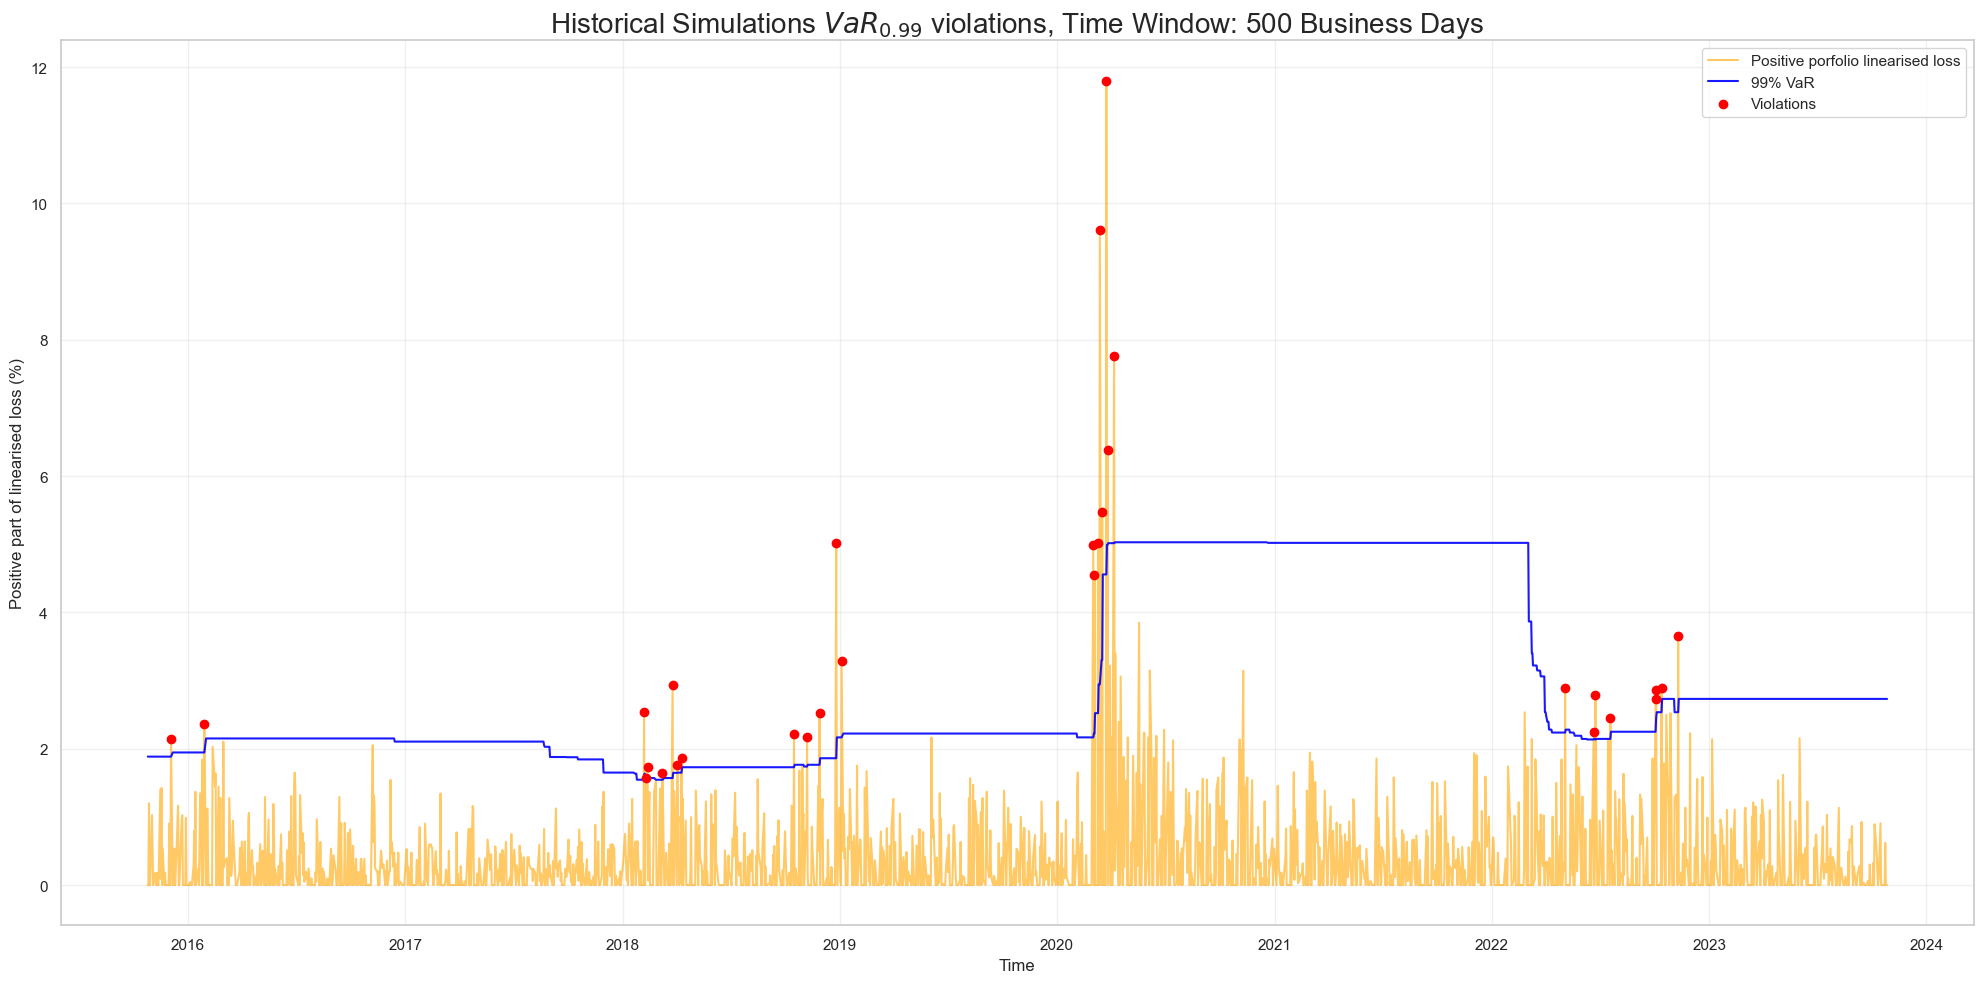

In [39]:
plt.figure(figsize=(20, 10))
plt.plot(df["date"].iloc[500:], df["positive_portfolio_loss"].iloc[500:]*100, label='Positive porfolio linearised loss', color="orange", alpha=0.6)
plt.plot(df["date"].iloc[500:], df["var_HS_0.99"].iloc[500:]*100, label="99% VaR", color="blue", alpha=0.9)

violations = df[df["violations_HS_0.99"]  == 1]
plt.scatter(violations["date"], violations["linearised_loss"]*100, color="red", label="Violations", zorder=5)

plt.title("Historical Simulations $VaR_{0.99}$ violations, Time Window: 500 Business Days", fontsize=20)
plt.xlabel("Time")
plt.ylabel("Positive part of linearised loss (%)")
plt.legend()

plt.tight_layout()
plt.grid(alpha=0.3)


plt.show()


In [40]:
df_q1 = df.copy(deep = True)

## b. Filtered historical simulations

### EWMA (Exponential weighted moving average)

The **EWMA volatility forecast** is computed recursively by

$$
\hat{\sigma}^2_{t+1} = \alpha (X_t - \hat{\mu}_t)^2 + (1 - \alpha) \hat{\sigma}^2_t,
$$

where $\hat{\mu}_t$ is an estimate for the conditional mean, while the parameter value $\alpha = 0.06$ has been recommended for **daily data**.

- $X_t$ represent the linearised loss at time $t$,
- $\hat{\sigma}^2_{t+1}$ represents the forecasted volatility


Here, we have by asssumption that $\hat{\mu}_t = 0$ for all $t$.


We see that by construction, the first value for the `linearised_loss` is `NaN`, so we have to drop it in order to compute our estimated $\hat \sigma_0^2$, which in practice is $\hat \sigma_1^2$

In [41]:
df['linearised_loss']

0            NaN
1      -0.003577
2       0.003935
3       0.001435
4      -0.001435
          ...   
2511   -0.006186
2512    0.006186
2513   -0.003540
2514   -0.008503
2515   -0.011322
Name: linearised_loss, Length: 2516, dtype: float64

In [42]:
df = df.dropna(subset=['linearised_loss']).reset_index()
df.drop(columns='index', inplace=True)

In [43]:
df['variance_forecast_ewma'] = np.nan

In [44]:
alpha = 0.06
mu = 0
window = 500

To quantify the initial variance $\hat{\sigma_0}^2$ we use the **population variance** over the whole dataset. The population variance $\hat\sigma_t$ is defined as:

$$
\hat{\sigma_0}^2 = \frac{1}{N} \sum_{i=0}^{N} (X_i - \hat{\mu}_t)^2
$$

In [45]:
df.at[0, 'variance_forecast_ewma'] = df['linearised_loss'].var()

In [46]:
for t in range(1, df.shape[0]):
    prev_vol = df.at[t-1,'variance_forecast_ewma']
    prev_lin_loss = df.at[t-1, 'linearised_loss']
    df.at[t, 'variance_forecast_ewma'] = alpha * prev_lin_loss**2 + (1-alpha)*prev_vol

In [47]:
df['realised_vol'] = df['linearised_loss'].rolling(window = 20).std()

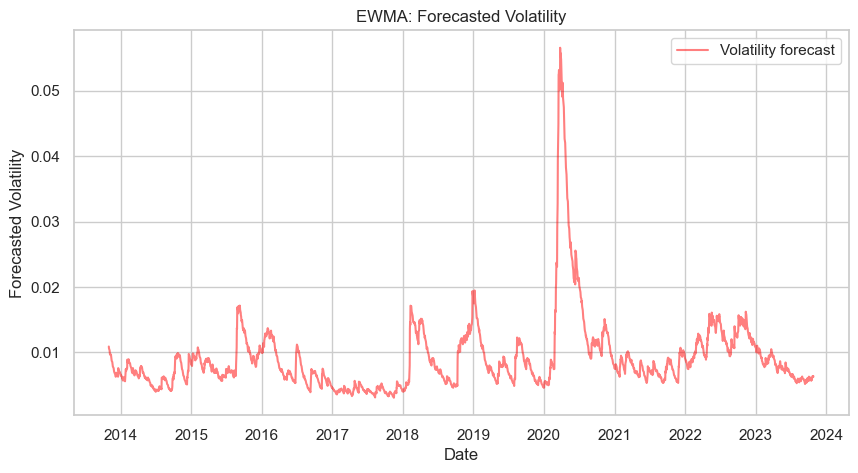

In [48]:
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['variance_forecast_ewma'].apply(lambda x: math.sqrt(x)), label='Volatility forecast', alpha=0.5, color = 'red')
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Forecasted Volatility")
plt.title("EWMA: Forecasted Volatility")
plt.legend()
plt.show()

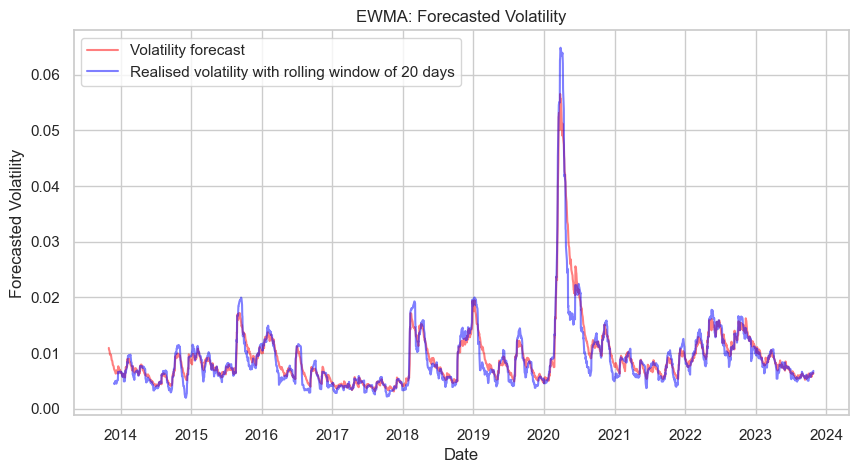

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['variance_forecast_ewma'].apply(lambda x: math.sqrt(x)), label='Volatility forecast', alpha=0.5, color = 'red')
plt.plot(df['date'], df['realised_vol'], label='Realised volatility with rolling window of 20 days', alpha = 0.5, color='blue')
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Forecasted Volatility")
plt.title("EWMA: Forecasted Volatility")
plt.legend()
plt.show()

We define the standardised residuals to be:
$$
\hat Z_t = \frac{\hat \epsilon_t}{\hat \sigma_t} = \frac{X_t}{\hat \sigma_t}
$$
since $\mu_t= 0$ for all $t$.

In [50]:
df['standardised_residuals'] = df['linearised_loss']/(df['variance_forecast_ewma'].apply(lambda x: math.sqrt(x)))

Now we can forecast the $VaR$ and the $ES$ through the following formulas:
$$
\widehat{\text{VaR}}_\alpha (L_{t+1}) = \hat{\mu}_{t+1} + \hat{\sigma}_{t+1} q_\alpha (Z_{t+1})
$$

$$
\phantom{\widehat{\text{VaR}}_\alpha (L_{t+1})} = \phantom{\hat{\mu}_{t+1}} \phantom{ + }  \hat{\sigma}_{t+1} q_\alpha (Z_{t+1})
$$

and
$$\widehat{\text{ES}}_\alpha (L_{t+1}) = \hat{\mu}_{t+1} + \hat{\sigma}_{t+1} \text{ES}_\alpha (Z_{t+1}). $$

$$
\phantom{\widehat{\text{ES}}_\alpha (L_{t+1})} = \phantom{\hat{\mu}_{t+1} + }\hat{\sigma}_{t+1} \text{ES}_\alpha (Z_{t+1}).
$$

since $\hat \mu_t=0$ for all $t$.


In [51]:
alpha_95 = 0.95
alpha_99 = 0.99
N = 500

In [52]:
def compute_var_es_FHS(N, alpha, df):
    df[f"var_FHS_{alpha}"] = np.nan
    df[f"es_FHS_{alpha}"] = np.nan
    for t in range(N, df.shape[0]):
        # Define the rolling window
        window = df.loc[t-N:t-1, 'standardised_residuals']
        # Compute the empirical alpha quantile (VaR) within the window
        quantile = window.quantile(alpha)
        sigma_t = math.sqrt(df.at[t,'variance_forecast_ewma'])
        # VaR_{alpha}(L_{t}) = \sigma_{t}*quantile_{alpha}(Z_t)
        df.at[t, f"var_FHS_{alpha}"] = quantile*sigma_t
        # Find the violations
        violations = window[window >= quantile]
        # Find the number of violations
        m_t_alpha = len(violations)
        if m_t_alpha > 0:
            es_alpha = violations.mean()
        else:
            es_alpha = 0
        df.at[t, f"es_FHS_{alpha}"] = es_alpha*sigma_t

In [53]:
compute_var_es_FHS(N, alpha_95, df)
compute_var_es_FHS(N, alpha_99, df)


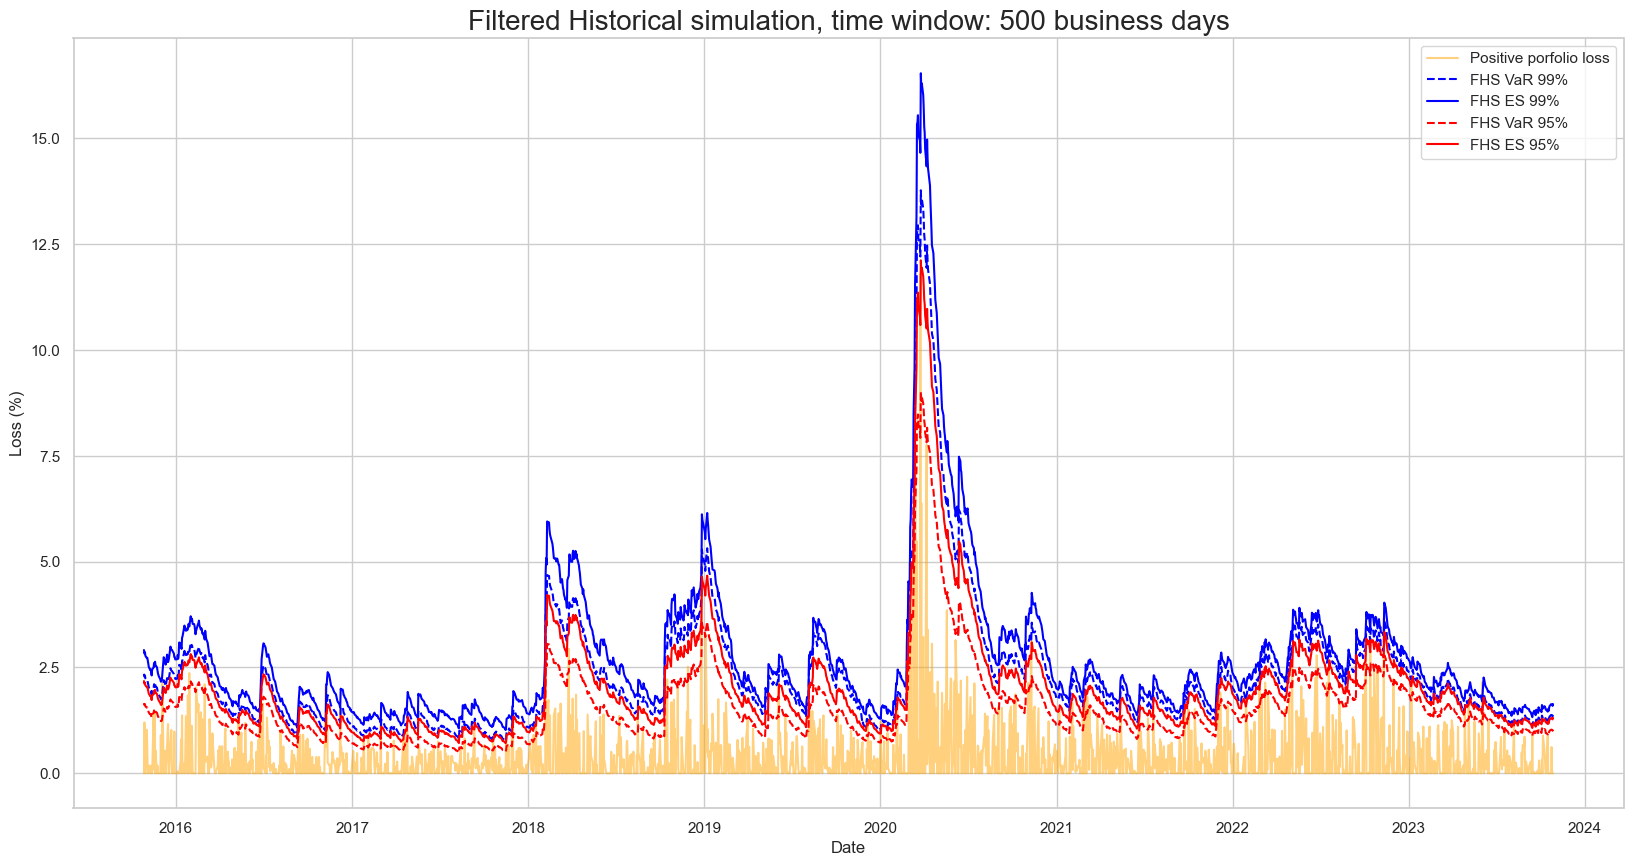

In [54]:
plt.figure(figsize=(20, 10))
plt.plot(df['date'].iloc[500:], df['positive_portfolio_loss'].iloc[500:]*100, label='Positive porfolio loss', alpha=0.5, color = 'orange')
plt.plot(df['date'].iloc[500:], df[f"var_FHS_0.99"].iloc[500:]*100, label=f'FHS VaR 99%', color='blue', linestyle = "--")
plt.plot(df['date'].iloc[500:], df[f"es_FHS_0.99"].iloc[500:]*100, label=f'FHS ES 99%', color='blue')
plt.plot(df['date'].iloc[500:], df[f"var_FHS_0.95"].iloc[500:]*100, label=f'FHS VaR 95%', color='red', linestyle = "--")
plt.plot(df['date'].iloc[500:], df[f"es_FHS_0.95"].iloc[500:]*100, label=f'FHS ES 95%', color='red')
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Loss (%)")
plt.title("Filtered Historical simulation, time window: 500 business days", fontsize=20)
plt.legend()


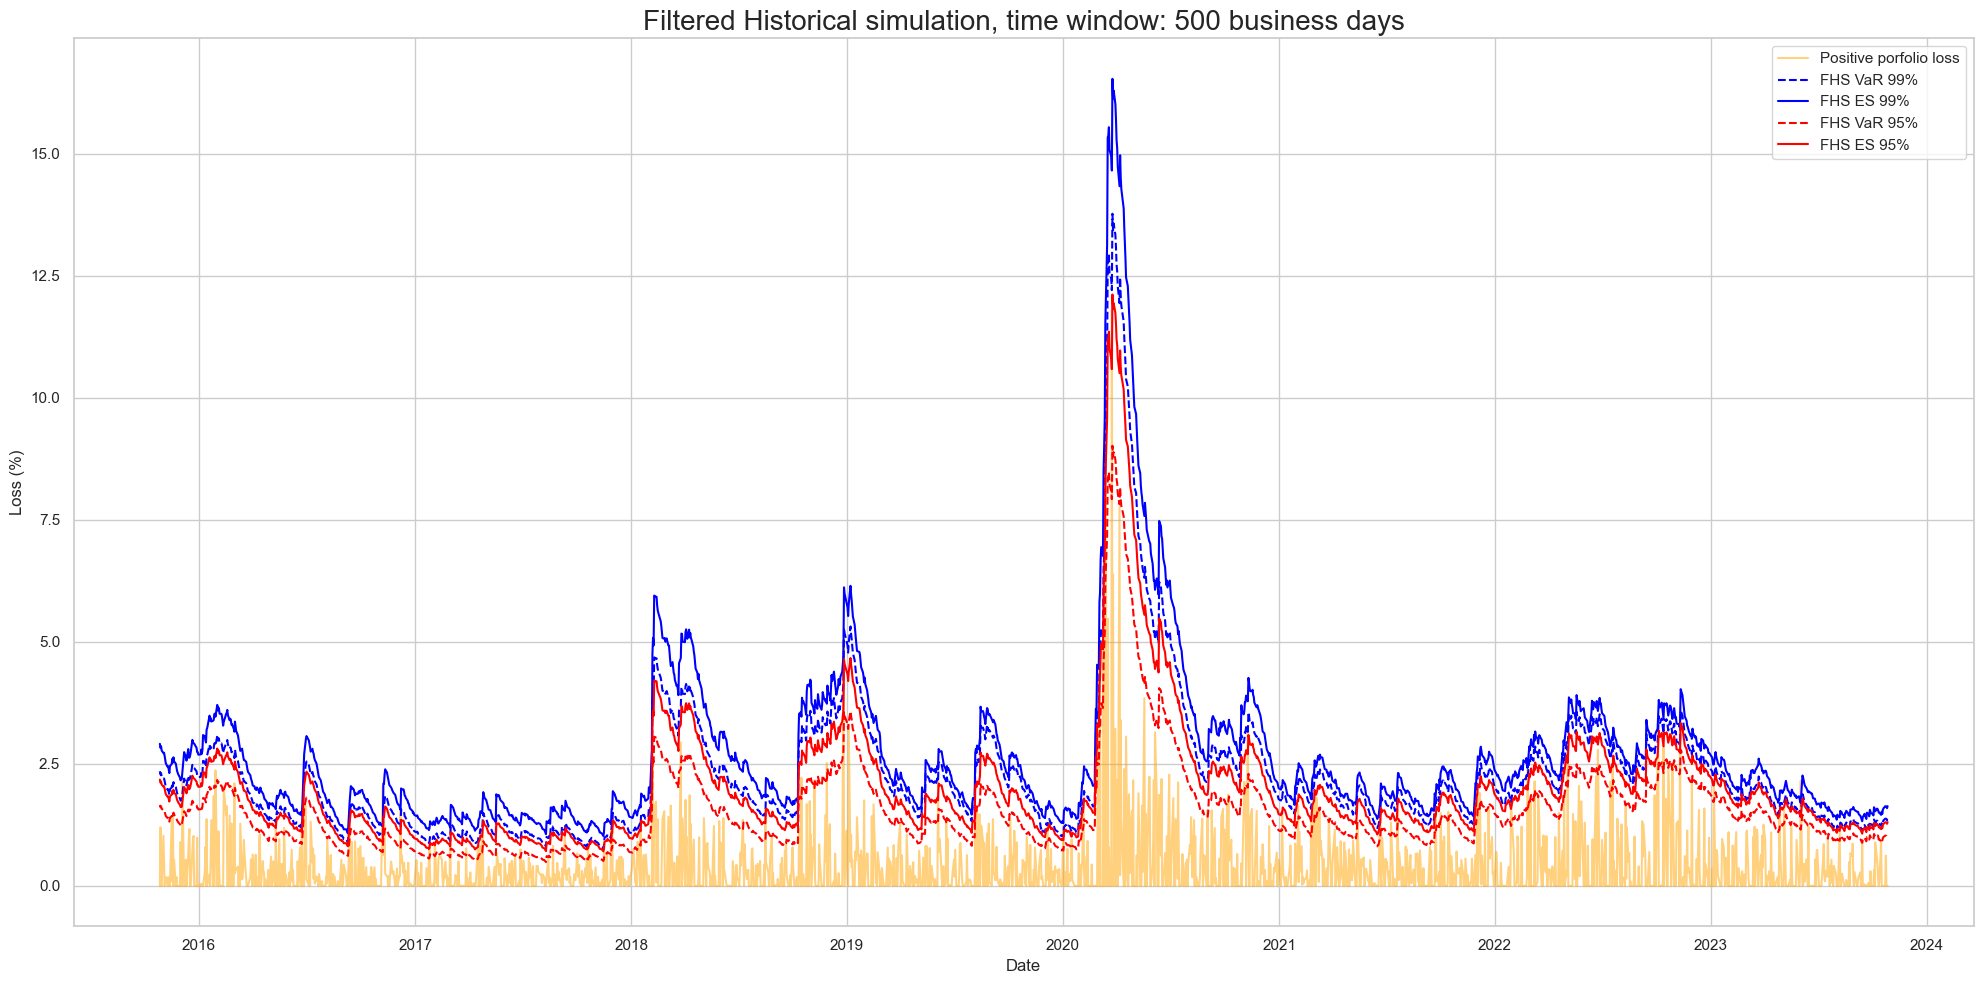

In [55]:
plt.figure(figsize=(20, 10))
plt.plot(df['date'].iloc[500:], df['positive_portfolio_loss'].iloc[500:]*100, label='Positive porfolio loss', alpha=0.5, color = 'orange')
plt.plot(df['date'].iloc[500:], df[f"var_FHS_0.99"].iloc[500:]*100, label=f'FHS VaR 99%', color='blue', linestyle = "--")
plt.plot(df['date'].iloc[500:], df[f"es_FHS_0.99"].iloc[500:]*100, label=f'FHS ES 99%', color='blue')
plt.plot(df['date'].iloc[500:], df[f"var_FHS_0.95"].iloc[500:]*100, label=f'FHS VaR 95%', color='red', linestyle = "--")
plt.plot(df['date'].iloc[500:], df[f"es_FHS_0.95"].iloc[500:]*100, label=f'FHS ES 95%', color='red')
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Loss (%)")
plt.title("Filtered Historical simulation, time window: 500 business days", fontsize=20)
plt.legend()
plt.tight_layout()


In [56]:
df["violations_FHS_0.95"] = (df["linearised_loss"] > df["var_FHS_0.95"]).astype(int)
df["violations_FHS_0.99"] = (df["linearised_loss"] > df["var_FHS_0.99"]).astype(int)

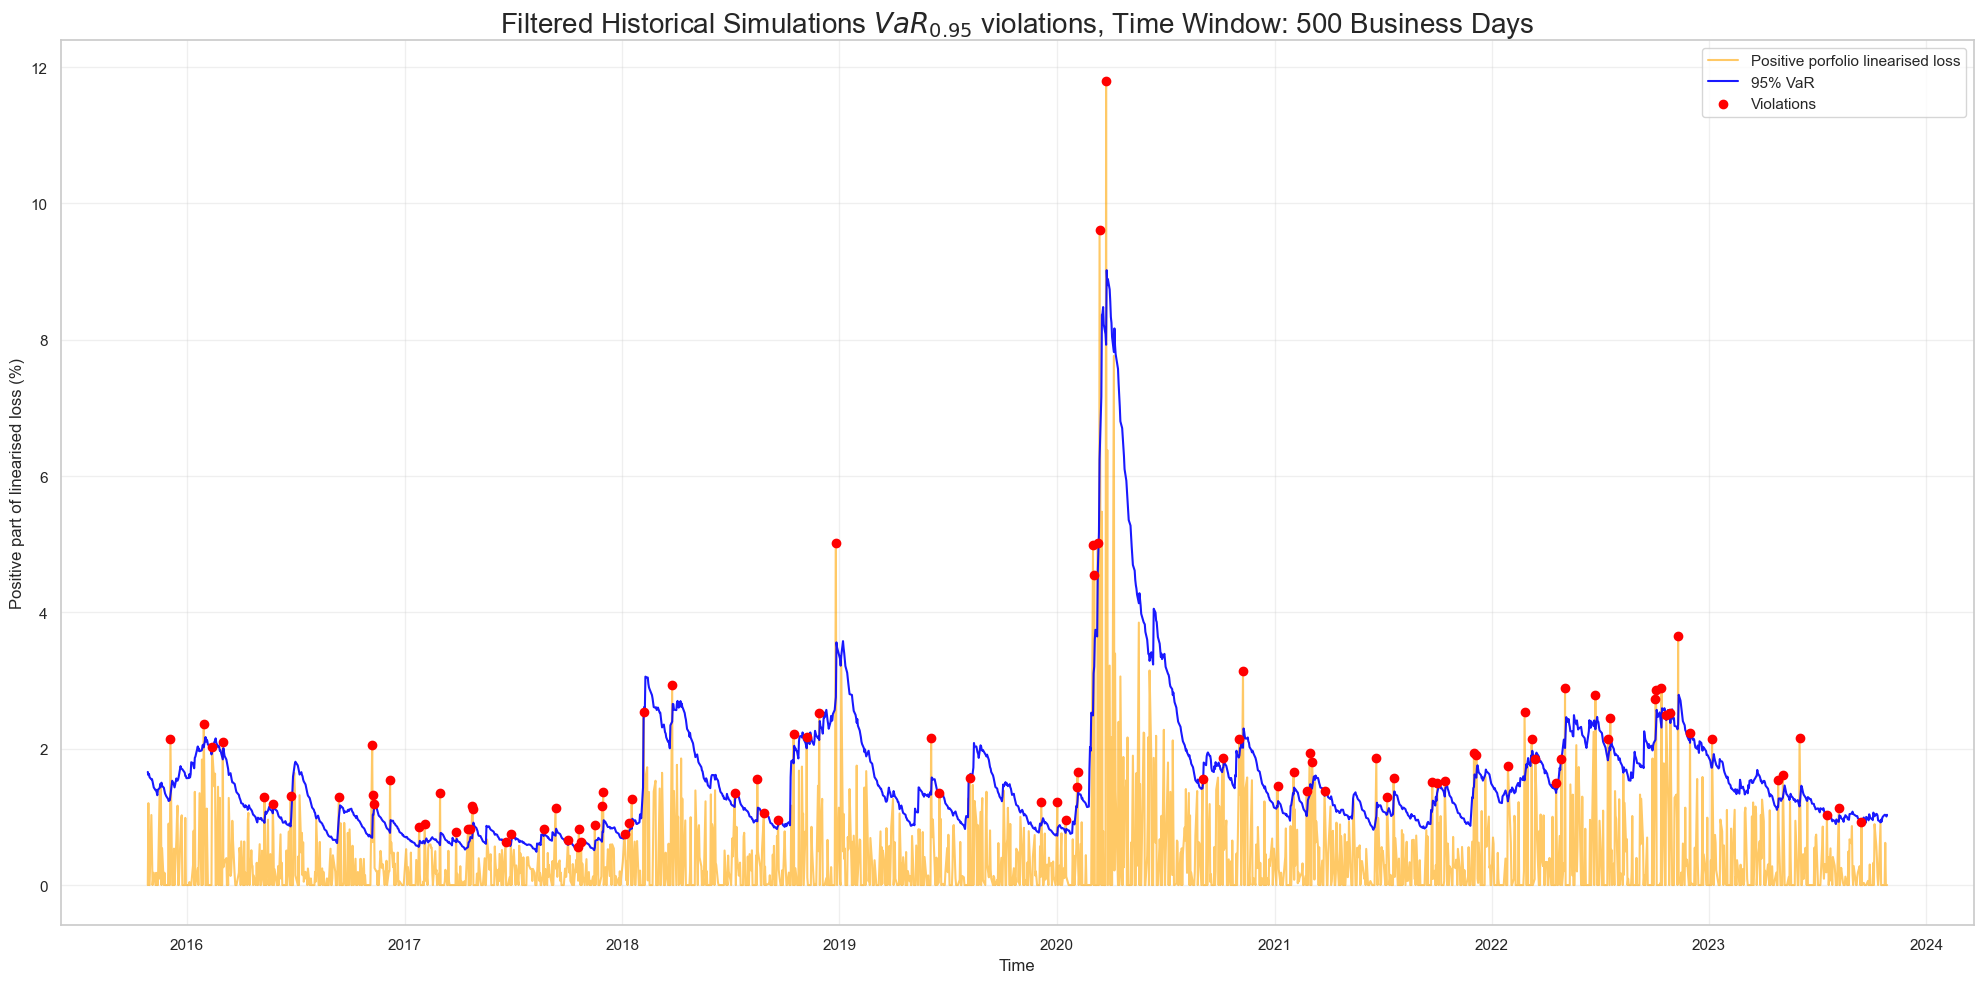

In [57]:
plt.figure(figsize=(20, 10))
plt.plot(df["date"].iloc[500:], df["positive_portfolio_loss"].iloc[500:]*100, label='Positive porfolio linearised loss', color="orange", alpha=0.6)
plt.plot(df["date"].iloc[500:], df["var_FHS_0.95"].iloc[500:]*100, label="95% VaR", color="blue", alpha=0.9)

violations = df[df["violations_FHS_0.95"]  == 1]
plt.scatter(violations["date"], violations["linearised_loss"]*100, color="red", label="Violations", zorder=5)

plt.title("Filtered Historical Simulations $VaR_{0.95}$ violations, Time Window: 500 Business Days", fontsize=20)
plt.xlabel("Time")
plt.ylabel("Positive part of linearised loss (%)")
plt.legend()

plt.tight_layout()
plt.grid(alpha=0.3)


plt.show()


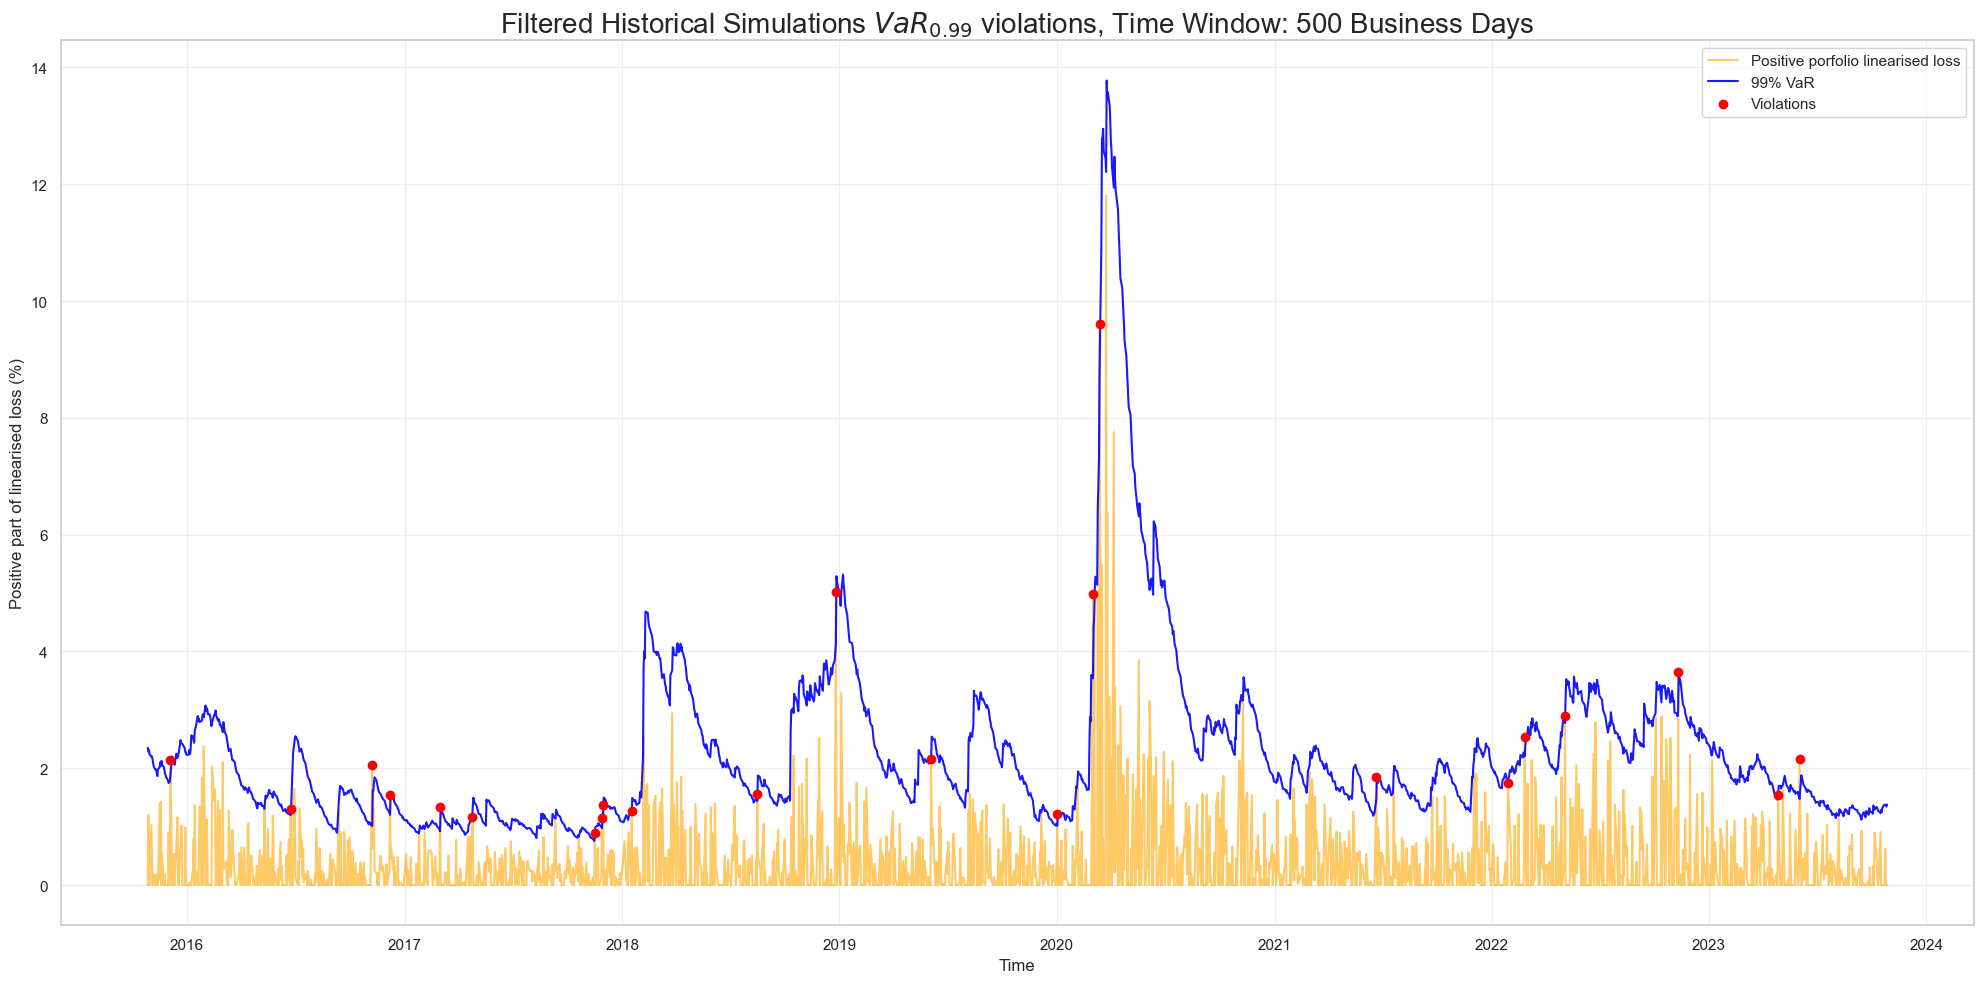

In [58]:
plt.figure(figsize=(20, 10))
plt.plot(df["date"].iloc[500:], df["positive_portfolio_loss"].iloc[500:]*100, label='Positive porfolio linearised loss', color="orange", alpha=0.6)
plt.plot(df["date"].iloc[500:], df["var_FHS_0.99"].iloc[500:]*100, label="99% VaR", color="blue", alpha=0.9)

violations = df[df["violations_FHS_0.99"]  == 1]
plt.scatter(violations["date"], violations["linearised_loss"]*100, color="red", label="Violations", zorder=5)

plt.title("Filtered Historical Simulations $VaR_{0.99}$ violations, Time Window: 500 Business Days", fontsize=20)
plt.xlabel("Time")
plt.ylabel("Positive part of linearised loss (%)")
plt.legend()

plt.tight_layout()
plt.grid(alpha=0.3)



plt.show()


Let us check for the distribution $F_Z$ of the residuals.

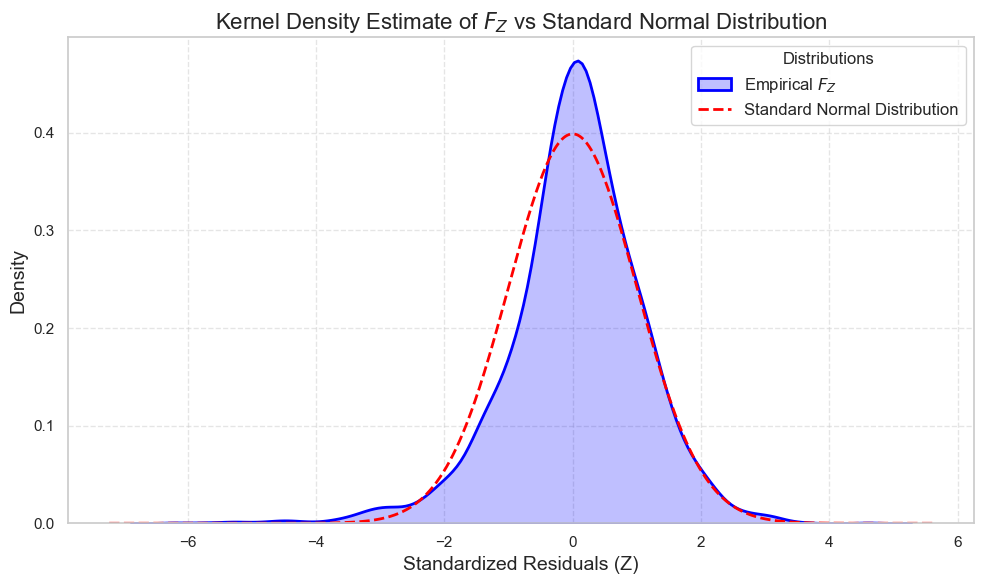

In [59]:
plt.figure(figsize=(10, 6))

sns.kdeplot(
    df['standardised_residuals'],
    shade=True,
    color='blue',
    label='Empirical $F_Z$',

    linewidth=2
)

x = np.linspace(df['standardised_residuals'].min() - 1, df['standardised_residuals'].max() + 1, 1000)
standard_normal_pdf = scipy.stats.norm.pdf(x, loc=0, scale=1)

plt.plot(
    x,
    standard_normal_pdf,
    color='red',
    linestyle='--',
    label='Standard Normal Distribution',
    linewidth=2
)

plt.title('Kernel Density Estimate of $F_Z$ vs Standard Normal Distribution', fontsize=16)
plt.xlabel('Standardized Residuals (Z)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Distributions', fontsize=12, title_fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


In [60]:
mean_residuals = df['standardised_residuals'].mean()
std_residuals = df['standardised_residuals'].std()
skewness_residuals = skew(df['standardised_residuals'])
kurtosis_residuals = kurtosis(df['standardised_residuals'])
print(f"Mean of the standardised residuals: {mean_residuals}")
print(f"Standard deviation of the standardised residuals: {std_residuals}")
print(f"Skewness of the standardised residuals: {skewness_residuals}")
print(f"Kurtosis of the standardised residuals: {kurtosis_residuals}")

Mean of the standardised residuals: 0.042944300829239584
Standard deviation of the standardised residuals: 1.0510930130325793
Skewness of the standardised residuals: -0.6440039031454641
Kurtosis of the standardised residuals: 2.6172056996115565


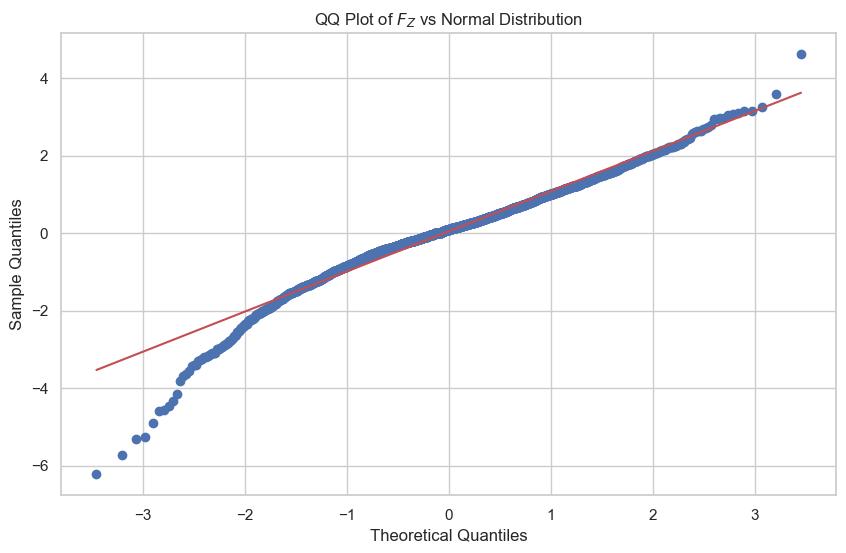

In [61]:
plt.figure(figsize=(10, 6))
scipy.stats.probplot(df['standardised_residuals'], dist="norm", plot=plt)
plt.title('QQ Plot of $F_Z$ vs Normal Distribution')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.show()


<Figure size 800x400 with 0 Axes>

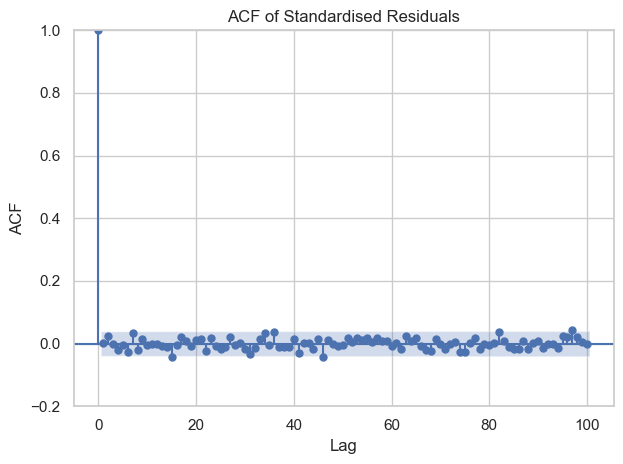

<Figure size 800x400 with 0 Axes>

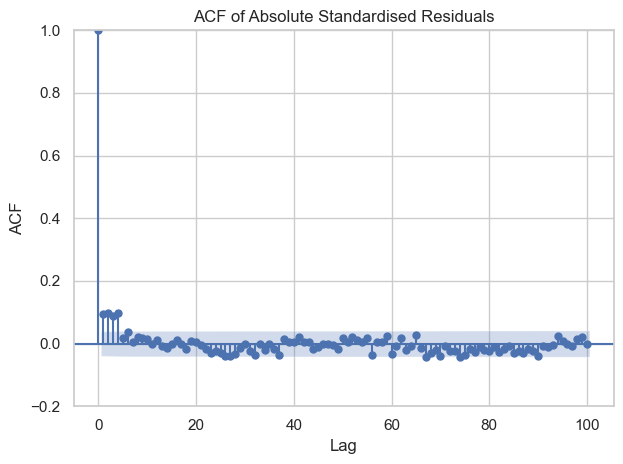

<Figure size 800x400 with 0 Axes>

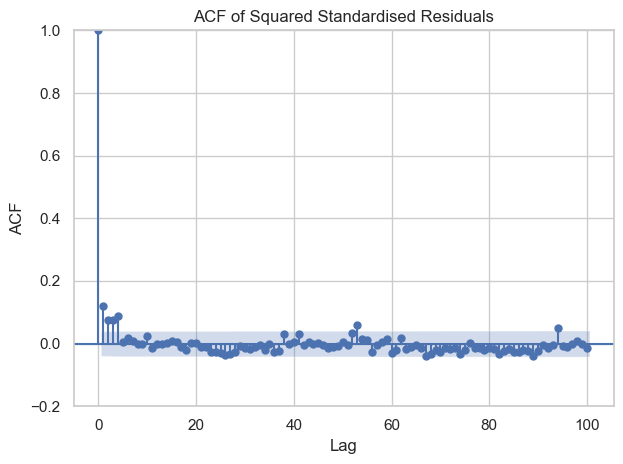

In [62]:

plt.figure(figsize=(8, 4))
plot_acf(df['standardised_residuals'], lags=100)
plt.title('ACF of Standardised Residuals')
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.ylim(-0.2, 1)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 4))
plot_acf(np.abs(df['standardised_residuals']), lags=100)
plt.title('ACF of Absolute Standardised Residuals')
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.ylim(-0.2, 1)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 4))
plot_acf(df['standardised_residuals'] ** 2, lags=100)
plt.title('ACF of Squared Standardised Residuals')
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.ylim(-0.2, 1)
plt.tight_layout()
plt.show()

In [63]:
stat, p_value = kstest(df['standardised_residuals'], 'norm')

print('Kolmogorov-Smirnov Test:')
print(f'Statistic={stat:.4f}, p-value={p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print('Sample distribution does not match the normal distribution (reject H0)')


Kolmogorov-Smirnov Test:
Statistic=0.0721, p-value=0.0000
Sample distribution does not match the normal distribution (reject H0)


Backtesting

The unconditional coverage test is designed to evaluate whether the frequency of $VaR$ violations (i.e. the times when actual losses exceed the predicted $VaR$ threshold) matches the expected level for a given confidence level. <br>
When a VaR model is designed, it forecasts a specific confidence level, such as 95% or 99%. This means that we expect losses to exceed the VaR estimate 5% or 1% of the time, respectively. <br>
Kupiec’s test compares the actual rate of these exceedances to the expected rate and the null hypothesis is:
$$ H_0: \mathbb E[I_t | \mathcal F_{t-1}] = \mathbb P[I_t = 1|\mathcal F_{t-1}] = 1-\alpha \phantom{space space space} \forall t \in \{1,...,T\}$$
with $\mathcal F_{t-1}$ being the $\sigma$-algebra generated by the $VaR$ violation indicators $I_1,...,I_{t-1}$, where $I_t:=\begin{cases}1 & L_t > \widehat{VaR}_{\alpha}(L_t)\\ 0 & L_t \leq \widehat{VaR}_{\alpha}(L_t)\end{cases}$. <br>
The test statistic is defined as the likelihood ratio:
$$ LR_{uc}:= -2\log \frac{L(1-\alpha;I_1,...,I_T)}{L(\hat \pi; I_1,...,I_T)}\phantom{sp}\underset{T \to \infty }{\xrightarrow{d}}\phantom{sp} \chi^2(1) \phantom{space space space} \text{under } H_0$$
where $$\hat \pi := \frac 1 T \sum_{t=1}^T I_t$$

In [64]:
def violations_pi_hat(df, alpha, type):
    tot_length = len(df[f'var_{type}_{alpha}'].dropna())
    violations = (df['linearised_loss']>df[f'var_{type}_{alpha}']).iloc[-tot_length:].astype(int).sum()
    return violations, (violations / tot_length)

In [65]:
violations_hs_95, pi_hat_hs_95 = violations_pi_hat(df, alpha_95, "HS")
violations_hs_99, pi_hat_hs_99 =  violations_pi_hat(df, alpha_99, "HS")
violations_fhs_95, pi_hat_fhs_95 = violations_pi_hat(df, alpha_95, "FHS")
violations_fhs_99, pi_hat_fhs_99 =  violations_pi_hat(df, alpha_99, "FHS")

print(f"Violations for HS VaR 95%: {violations_hs_95}, Pi_hat: {pi_hat_hs_95}")
print(f"Violations for HS VaR 99%: {violations_hs_99}, Pi_hat: {pi_hat_hs_99}")
print(f"Violations for FHS VaR 95%: {violations_fhs_95}, Pi_hat: {pi_hat_fhs_95}")
print(f"Violations for FHS VaR 99%: {violations_fhs_99}, Pi_hat: {pi_hat_fhs_99}")


Violations for HS VaR 95%: 99, Pi_hat: 0.049107142857142856
Violations for HS VaR 99%: 30, Pi_hat: 0.01488095238095238
Violations for FHS VaR 95%: 99, Pi_hat: 0.04913151364764268
Violations for FHS VaR 99%: 23, Pi_hat: 0.01141439205955335


In [66]:
def UC_likelihood_ratio(df, pi_hat, alpha, violations, type):
    T = len(df[f'var_{type}_{alpha}'].dropna())
    denominator = pow(pi_hat, violations)*pow(1-pi_hat, T-violations)
    numerator = pow(1-alpha, violations)*pow(alpha, T-violations)
    return -2*math.log(numerator/denominator)

In [67]:
LR_HS_95 = UC_likelihood_ratio(df, pi_hat_hs_95, alpha_95, violations_hs_95, "HS")
LR_HS_99 = UC_likelihood_ratio(df, pi_hat_hs_99, alpha_99, violations_hs_99, "HS")
LR_FHS_95 = UC_likelihood_ratio(df, pi_hat_fhs_95, alpha_95, violations_fhs_95, "FHS")
LR_FHS_99 = UC_likelihood_ratio(df, pi_hat_fhs_99, alpha_99, violations_fhs_99, "FHS")
p_value_HS_95 = 1 - scipy.stats.chi2.cdf(LR_HS_95, 1)
p_value_HS_99 = 1 - scipy.stats.chi2.cdf(LR_HS_99, 1)
p_value_FHS_95 = 1 - scipy.stats.chi2.cdf(LR_FHS_95, 1)
p_value_FHS_99 = 1 - scipy.stats.chi2.cdf(LR_FHS_99, 1)
print(f"Unconditional test P-value for HS VaR 95% : {p_value_HS_95}")
print(f"Unconditional test P-value for HS VaR 99%: {p_value_HS_99}")
print(f"Unconditional test P-value for FHS VaR 95%: {p_value_FHS_95}")
print(f"Unconditional test P-value for FHS VaR 99%: {p_value_FHS_99}")

if p_value_HS_95 < 0.05:
    print("HS VaR 95% is not accepted")
else:
    print("HS VaR 95% is accepted")

if p_value_HS_99 < 0.05:
    print("HS VaR 99% is not accepted")
else:
    print("HS VaR 99% is accepted")

if p_value_FHS_95 < 0.05:
    print("FHS VaR 95% is not accepted")
else:
    print("FHS VaR 95% is accepted")

if p_value_FHS_99 < 0.05:
    print("FHS VaR 99% is not accepted")
else:
    print("FHS VaR 99% is accepted")

Unconditional test P-value for HS VaR 95% : 0.8536491628185908
Unconditional test P-value for HS VaR 99%: 0.03998761654448746
Unconditional test P-value for FHS VaR 95%: 0.8576464810869935
Unconditional test P-value for FHS VaR 99%: 0.53260951399691
HS VaR 95% is accepted
HS VaR 99% is not accepted
FHS VaR 95% is accepted
FHS VaR 99% is accepted


We now look at Christoffersen's independence test for $VaR$, which focuses on clustered VaR violations. <br>
The main assumption is that $I_1,...,I_T$ form a first-order Markov chain.<br>
We define the transition matrix:$$ \Pi := \begin{bmatrix} 1-\pi_{01} & \pi_{01} \\ 1-\pi_{11} & \pi_{11}\end{bmatrix} \phantom{space}, \phantom{space} \pi_{ij} := \mathbb P[I_t = j|I_{t-1} = i]$$
We find that the ML estimators for $\pi_{11}$ and $\pi_{01}$ are $$\hat \pi_{11} = \frac{T_{11}}{T_{10}+T_{11}} \phantom{space} , \phantom{space} \hat \pi_{01} = \frac{T_{01}}{T_{00}+T_{01}}$$
where $T_{ij}$ is the number of observations with $i \in \{0,1\}$ followed by $j \in \{0,1\}$ in the violation sequence.<br>
We have: $$H_0 : \pi_{01}=\pi{11}$$ and under $H_0$ $$\hat\Pi_0 = \begin{bmatrix} 1-\hat \pi & \hat \pi \\ 1-\hat \pi & \hat\pi\end{bmatrix} \phantom{space},\phantom{space} \hat \pi := \frac 1 T \sum_{t=1}^T I_t $$
It is then useful to combine $LR_{joint}:= LR_{uc} + LR_{ind}$ which has joint null hypothesis

In [68]:
def transition_numbers(df, alpha, type):
    T = len(df[f'var_{type}_{alpha}'].dropna())
    loss = df['linearised_loss'].iloc[-T:]
    var = df[f'var_{type}_{alpha}'].iloc[-T:]
    T00 = 0
    T01 = 0
    T10 = 0
    T11 = 0
    I = 1 if loss.iloc[0] > var.iloc[0] else 0
    for i in range(1, T):
        if loss.iloc[i] > var.iloc[i]:
            if I == 1:
                T11 += 1
            else:
                T01 += 1
                I = 1
        else:
            if I == 1:
                T10 += 1
                I = 0
            else:
                T00 += 1
    return T00, T01, T10, T11

In [69]:
def IND_likelihood_ratio(df, alpha, type):
  T00, T01, T10, T11 = transition_numbers(df, alpha, type)
  _, pi_hat = violations_pi_hat(df, alpha, f"{type}")
  pi_hat_01 = T01/(T00+T01)
  pi_hat_11 = T11/(T01+T11)
  num = pow(1 - pi_hat, T00+T10) * pow(pi_hat, T01+T11)
  den = pow(1 - pi_hat_01, T00) * pow(pi_hat_01, T01) * pow(1 - pi_hat_11, T10) * pow(pi_hat_11, T11)
  return -2 * math.log(num/den)

In [70]:
def p_value_LR_joint(df, alpha, type, L_uc):
  L_ind = IND_likelihood_ratio(df, alpha, type)
  LR = L_uc + L_ind
  return 1 - scipy.stats.chi2.cdf(LR, 2)

In [71]:
p_value_HS_95_joint = p_value_LR_joint(df, alpha_95, "HS", LR_HS_95)
p_value_HS_99_joint = p_value_LR_joint(df, alpha_99, "HS", LR_HS_99)
p_value_FHS_95_joint = p_value_LR_joint(df, alpha_95, "FHS", LR_FHS_95)
p_value_FHS_99_joint = p_value_LR_joint(df, alpha_99, "FHS", LR_FHS_99)

print(f"Joint test P-value for HS VaR 95% : {p_value_HS_95_joint}")
print(f"Joint test P-value for HS VaR 99%: {p_value_HS_99_joint}")
print(f"Joint test P-value for FHS VaR 95%: {p_value_FHS_95_joint}")
print(f"Joint test P-value for FHS VaR 99%: {p_value_FHS_99_joint}")

if p_value_HS_95_joint < 0.05:
    print("HS VaR 95% is not accepted")
else:
    print("HS VaR 95% is accepted")

if p_value_HS_99_joint < 0.05:
    print("HS VaR 99% is not accepted")
else:
    print("HS VaR 99% is accepted")

if p_value_FHS_95_joint < 0.05:
    print("FHS VaR 95% is not accepted")
else:
    print("FHS VaR 95% is accepted")

if p_value_FHS_99_joint < 0.05:
    print("FHS VaR 99% is not accepted")
else:
    print("FHS VaR 99% is accepted")

Joint test P-value for HS VaR 95% : 0.09246435379027729
Joint test P-value for HS VaR 99%: 0.026309001670042464
Joint test P-value for FHS VaR 95%: 0.8990447803226013
Joint test P-value for FHS VaR 99%: 0.6310251391706547
HS VaR 95% is accepted
HS VaR 99% is not accepted
FHS VaR 95% is accepted
FHS VaR 99% is accepted


Backtesting ES

In [72]:
def xis(df, type, alpha):
  T = len(df[f'var_{type}_{alpha}'].dropna())
  loss = df['linearised_loss'].iloc[-T:]
  var = df[f'var_{type}_{alpha}'].iloc[-T:]
  es = df[f'es_{type}_{alpha}'].iloc[-T:]
  loss.reset_index(drop=True, inplace=True)
  var.reset_index(drop=True, inplace=True)
  es.reset_index(drop=True, inplace=True)
  xi = np.zeros(len(var))
  for t in range(len(var)):
    if loss[t] > var[t]:
      xi[t] = loss[t] - es[t]
  return xi

In [73]:
def z_score(df, type, alpha):
    xi = xis(df, type, alpha)
    return xi.mean()/xi.std()

In [74]:
def backtest_es(df, type, alpha):
    z = z_score(df,type,alpha)
    return 1 - stats.norm.cdf(z)

In [75]:

df_b_aux = df.copy()
df_b_aux = df_b_aux[df_b_aux['var_HS_0.95'].notnull()]
df_b_aux.reset_index(drop=True, inplace=True)

df_b_aux['var95_violation_HS'] = np.where(df_b_aux['linearised_loss'] > df_b_aux['var_HS_0.95'], 1, 0)
df_b_aux['var99_violation_HS'] = np.where(df_b_aux['linearised_loss'] > df_b_aux['var_HS_0.99'], 1, 0)

df_b_aux['xis_95_HS'] = np.where(df_b_aux['var95_violation_HS'] == 1, df_b_aux['linearised_loss'] - df_b_aux['es_HS_0.95'], 0)
df_b_aux['xis_99_HS'] = np.where(df_b_aux['var99_violation_HS'] == 1, df_b_aux['linearised_loss'] - df_b_aux['es_HS_0.99'], 0)

z_95 = df_b_aux['xis_95_HS'].sum() / np.sqrt(np.sum(np.square(df_b_aux['xis_95_HS'])))
z_99 = df_b_aux['xis_99_HS'].sum() / np.sqrt(np.sum(np.square(df_b_aux['xis_99_HS'])))
p_value_es_HS_95 = 1 - norm.cdf(z_95)
p_value_es_HS_99 = 1 - norm.cdf(z_99)


In [76]:
df_b_aux = df.copy()
df_b_aux = df_b_aux[df_b_aux['var_FHS_0.95'].notnull()]
df_b_aux.reset_index(drop=True, inplace=True)

df_b_aux['var95_violation_EWMA'] = np.where(df_b_aux['linearised_loss'] > df_b_aux['var_FHS_0.95'], 1, 0)
df_b_aux['var99_violation_EWMA'] = np.where(df_b_aux['linearised_loss'] > df_b_aux['var_FHS_0.99'], 1, 0)

df_b_aux['xis_95_EWMA'] = np.where(df_b_aux['var95_violation_EWMA'] == 1, df_b_aux['linearised_loss'] - df_b_aux['es_FHS_0.95'], 0)
df_b_aux['xis_99_EWMA'] = np.where(df_b_aux['var99_violation_EWMA'] == 1, df_b_aux['linearised_loss'] - df_b_aux['es_FHS_0.99'], 0)

z_95 = df_b_aux['xis_95_EWMA'].sum() / np.sqrt(np.sum(np.square(df_b_aux['xis_95_EWMA'])))
z_99 = df_b_aux['xis_99_EWMA'].sum() / np.sqrt(np.sum(np.square(df_b_aux['xis_99_EWMA'])))
p_value_es_FHS_95 = 1 - norm.cdf(z_95)
p_value_es_FHS_99 = 1 - norm.cdf(z_99)

In [77]:
#p_value_es_HS_95 = backtest_es(df, "HS", alpha_95)
#p_value_es_HS_99 = backtest_es(df, "HS", alpha_99)
#p_value_es_FHS_95 = backtest_es(df, "FHS", alpha_95)
#p_value_es_FHS_99 = backtest_es(df, "FHS", alpha_99)

print(f"Backtest ES P-value for HS ES 95% : {p_value_es_HS_95}")
print(f"Backtest ES P-value for HS ES 99%: {p_value_es_HS_99}")
print(f"Backtest ES P-value for FHS ES 95%: {p_value_es_FHS_95}")
print(f"Backtest ES P-value for FHS ES 99%: {p_value_es_FHS_99}")

if p_value_es_HS_95 < 0.05:
    print("HS ES 95% is not accepted")
else:
    print("HS ES 95% is accepted")

if p_value_es_HS_99 < 0.05:
    print("HS ES 99% is not accepted")
else:
    print("HS ES 99% is accepted")

if p_value_es_FHS_95 < 0.05:
    print("FHS ES 95% is not accepted")
else:
    print("FHS ES 95% is accepted")

if p_value_es_FHS_99 < 0.05:
    print("FHS ES 99% is not accepted")
else:
    print("FHS ES 99% is accepted")

Backtest ES P-value for HS ES 95% : 0.13033613626606655
Backtest ES P-value for HS ES 99%: 0.0375732713475061
Backtest ES P-value for FHS ES 95%: 0.40174263541856714
Backtest ES P-value for FHS ES 99%: 0.791162391676652
HS ES 95% is accepted
HS ES 99% is not accepted
FHS ES 95% is accepted
FHS ES 99% is accepted


(iii) FHS with GARCH: use a rolling window scheme, whereby you estimate a
GARCH(1,1) model, with constant conditional mean and standard normal
innovations, every day using the data over the past 500 trading days. Determine
the distribution FZ by applying historical simulation to the standardised
GARCH residuals and use then the formulae in Part 3, slide 101 and the
one-day-ahead GARCH volatility forecast to compute the VaR and ES forecasts.

In [78]:
df_b = pd.read_csv("QRM-2024-cw1-data-b.csv")
df_b = df_b[df_b['Date'].notnull()].reset_index(drop=True)
df_b = df_b[df_b['Adj Close'].notnull()].reset_index(drop=True)

In [79]:
df_b['simple_ret'] = df_b['Adj Close'].pct_change()
df_b['log_ret'] = np.log(1+df_b['simple_ret'])
df_b.drop(index=0, inplace=True)
df_b.reset_index(drop=True, inplace=True)

df_b['simple_ret_pct'] = df_b['simple_ret']*100
df_b['log_ret_pct'] = df_b['log_ret']*100
df_b['loss'] = (-1) * df_b['log_ret_pct']

In [80]:
garch_var_95 = np.zeros(len(df_b))
garch_var_99 = np.zeros(len(df_b))
garch_ES_95 = np.zeros(len(df_b))
garch_ES_99 = np.zeros(len(df_b))

for i in range(500, len(df_b)):
    model = arch_model(df_b['loss'][i-500:i], mean='constant', p=1, q=1, dist='normal')
    res = model.fit(update_freq=1,disp=False)
    mu_hat = res.params.mu
    sigma_hat = np.sqrt(res.forecast(reindex=False).variance).iloc[0,0]
    std_res = res.std_resid
    std_res_p95 = np.quantile(std_res,0.95)
    std_res_p99 = np.quantile(std_res,0.99)
    std_res_ES_95 = np.mean(std_res[std_res >= std_res_p95])
    std_res_ES_99 = np.mean(std_res[std_res >= std_res_p99])
    garch_var_95[i] = mu_hat + sigma_hat * std_res_p95
    garch_var_99[i] = mu_hat + sigma_hat * std_res_p99
    garch_ES_95[i] = mu_hat + sigma_hat * std_res_ES_95
    garch_ES_99[i] = mu_hat + sigma_hat * std_res_ES_99

df_b['garch_var_95'] = garch_var_95
df_b['garch_var_99'] = garch_var_99
df_b['garch_ES_95'] = garch_ES_95
df_b['garch_ES_99'] = garch_ES_99

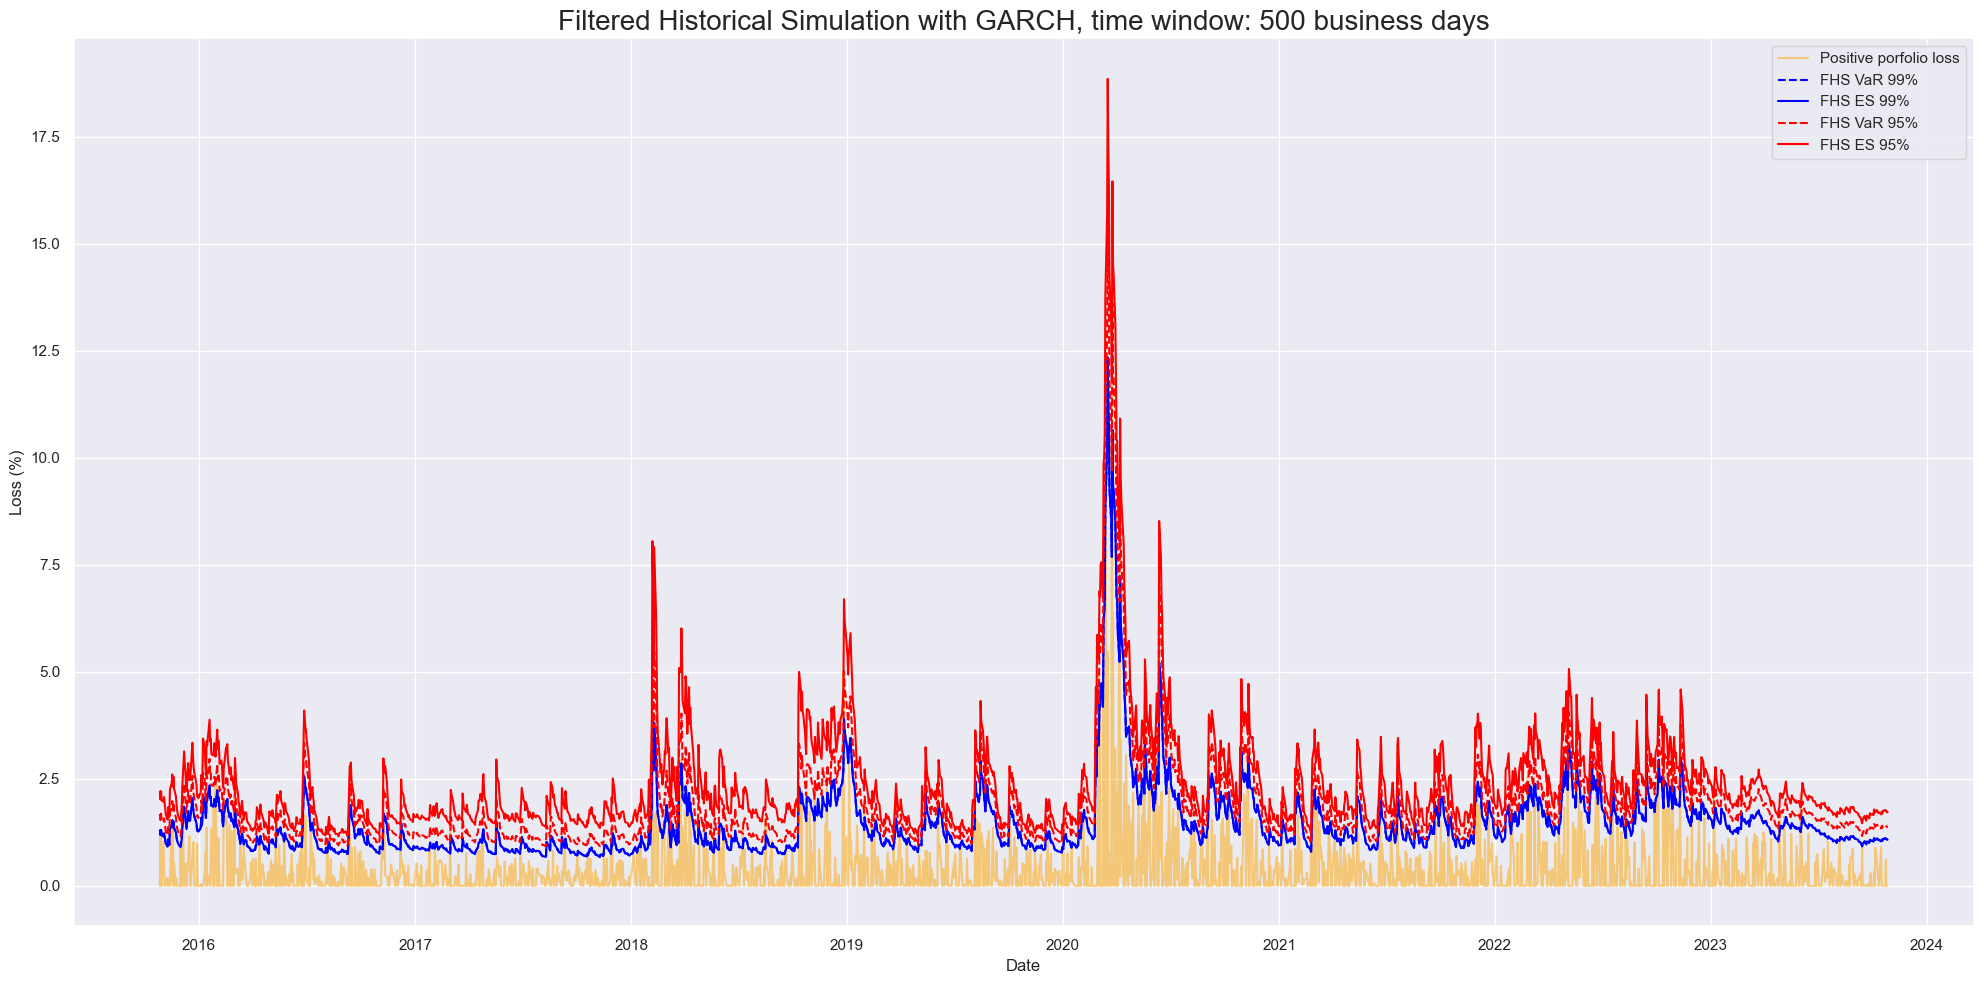

In [81]:
sns.set_style("darkgrid")
plt.figure(figsize=(20, 10))
df_b_ = df_b[df_b['garch_ES_99'] != 0]
plt.plot(pd.to_datetime(df_b_['Date']), np.where(df_b_['loss'] > 0, df_b_['loss'], 0), label='Positive porfolio loss', alpha=0.5, color = 'orange')
plt.plot(pd.to_datetime(df_b_['Date']), df_b_['garch_var_95'], label=f'FHS VaR 99%', color='blue', linestyle = "--")
plt.plot(pd.to_datetime(df_b_['Date']), df_b_['garch_var_95'], label=f'FHS ES 99%', color='blue')
plt.plot(pd.to_datetime(df_b_['Date']), df_b_['garch_ES_95'], label=f'FHS VaR 95%', color='red', linestyle = "--")
plt.plot(pd.to_datetime(df_b_['Date']), df_b_['garch_ES_99'], label=f'FHS ES 95%', color='red')
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Loss (%)")
plt.title("Filtered Historical Simulation with GARCH, time window: 500 business days", fontsize=20)
plt.legend()
plt.tight_layout()

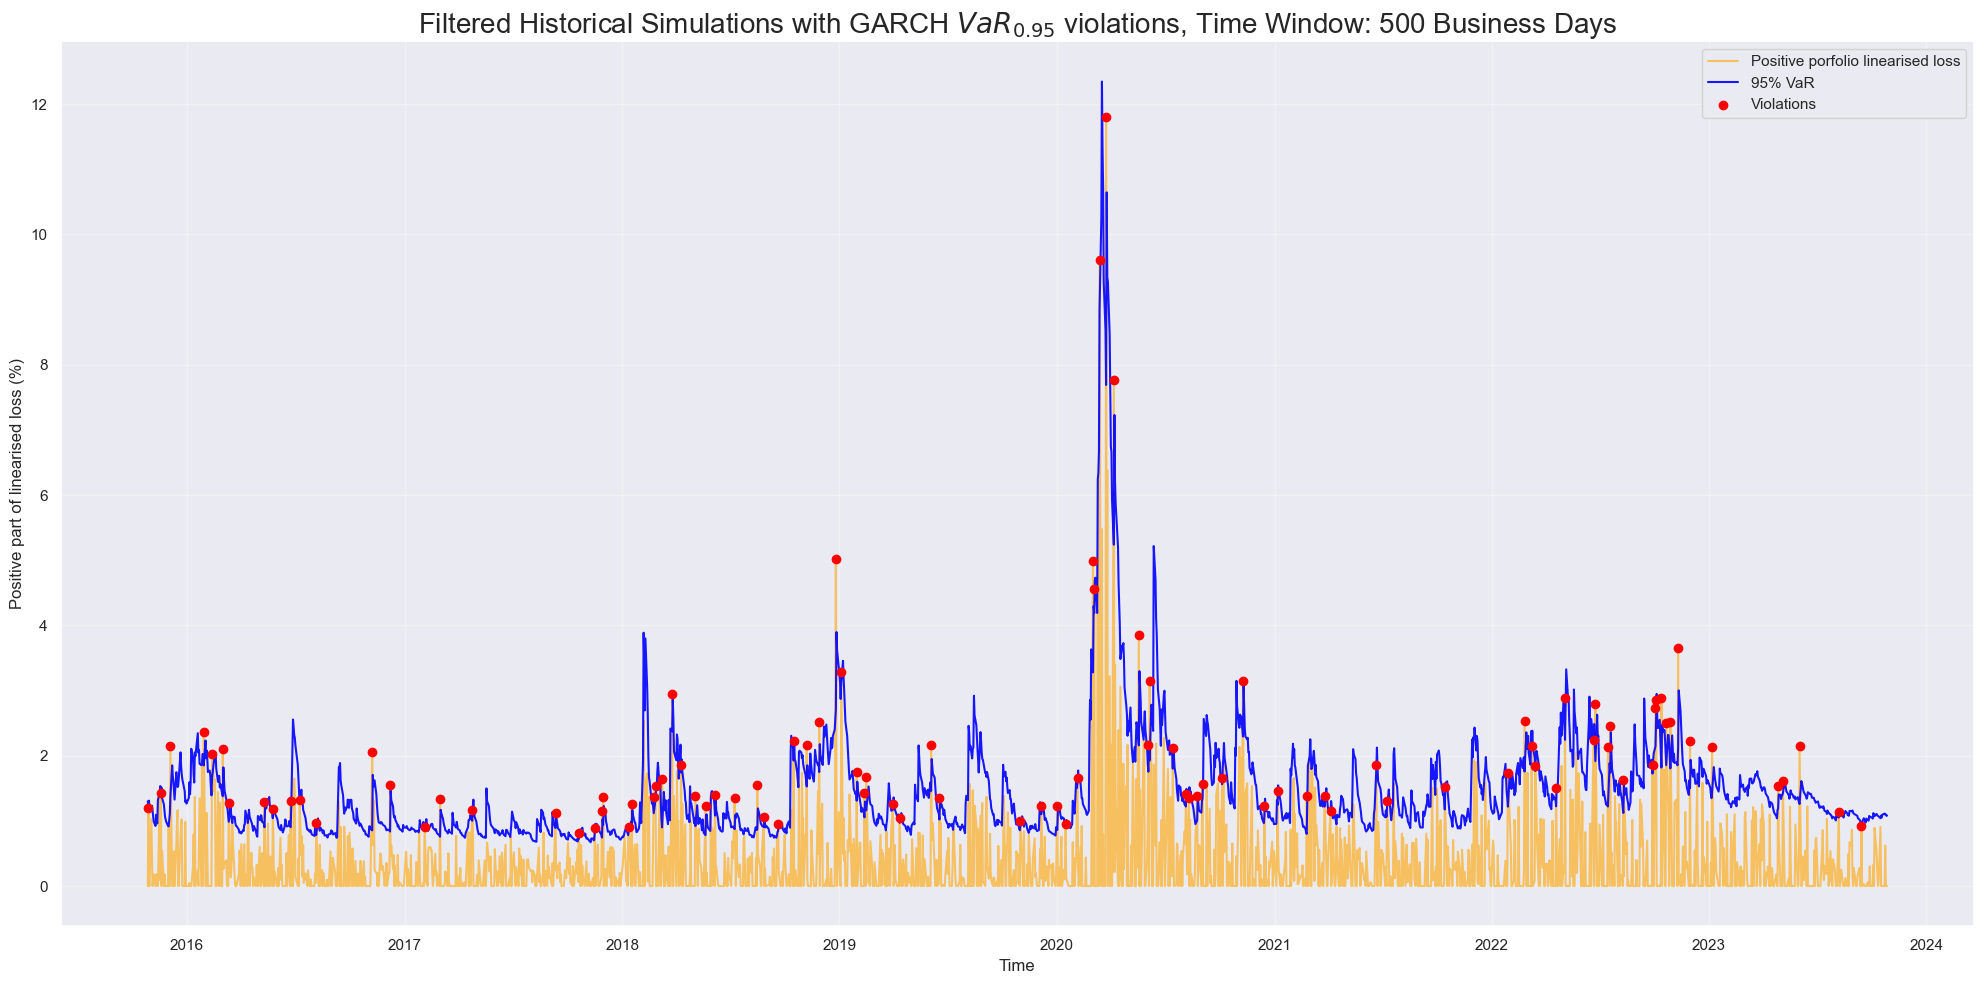

In [82]:
plt.figure(figsize=(20, 10))
plt.plot(pd.to_datetime(df_b_['Date']), np.where(df_b_['loss'] > 0, df_b_['loss'], 0), label='Positive porfolio linearised loss', color="orange", alpha=0.6)
plt.plot(pd.to_datetime(df_b_['Date']), df_b_['garch_var_95'], label="95% VaR", color="blue", alpha=0.9)

plt.scatter(pd.to_datetime(df_b_[df_b_['loss'] > df_b_['garch_var_95']]['Date']), df_b_[df_b_['loss'] > df_b_['garch_var_95']]['loss'], color="red", label="Violations", zorder=5)

plt.title("Filtered Historical Simulations with GARCH $VaR_{0.95}$ violations, Time Window: 500 Business Days", fontsize=20)
plt.xlabel("Time")
plt.ylabel("Positive part of linearised loss (%)")
plt.legend()

plt.tight_layout()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

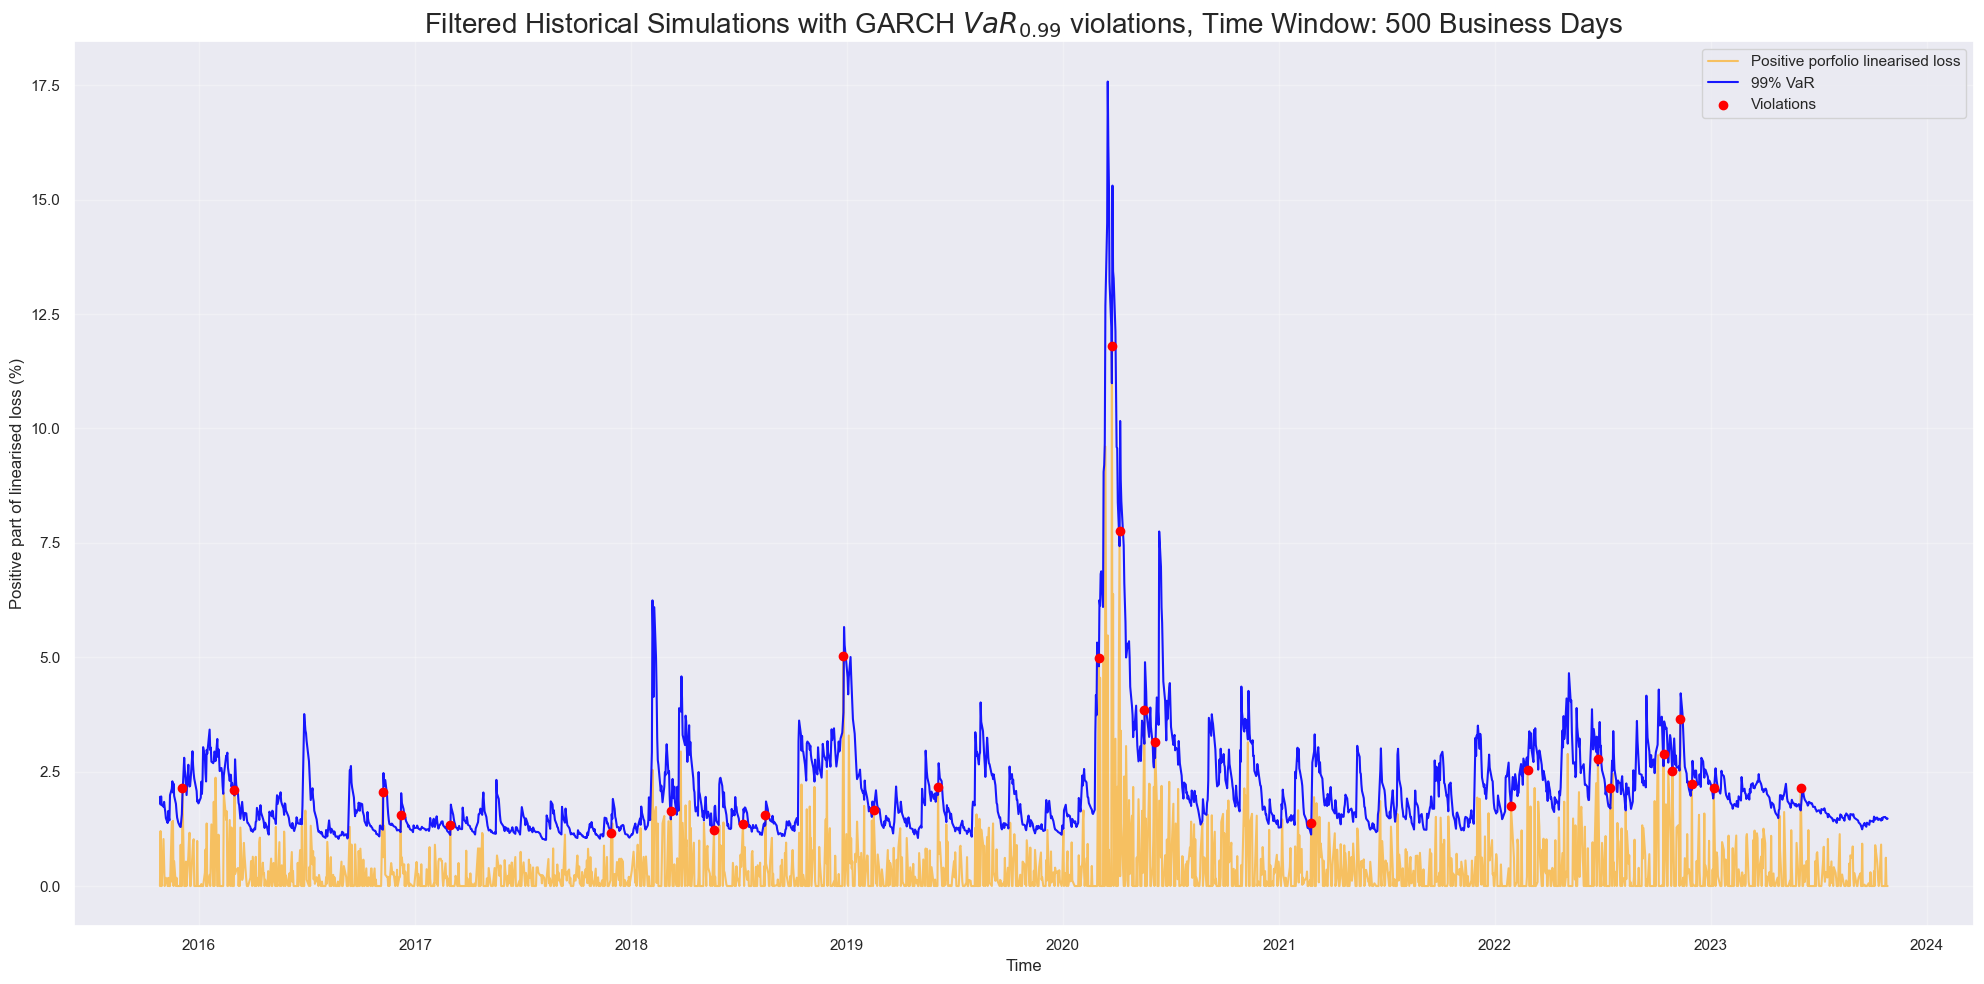

In [83]:
plt.figure(figsize=(20, 10))
plt.plot(pd.to_datetime(df_b_['Date']), np.where(df_b_['loss'] > 0, df_b_['loss'], 0), label='Positive porfolio linearised loss', color="orange", alpha=0.6)
plt.plot(pd.to_datetime(df_b_['Date']), df_b_['garch_var_99'], label="99% VaR", color="blue", alpha=0.9)

plt.scatter(pd.to_datetime(df_b_[df_b_['loss'] > df_b_['garch_var_99']]['Date'], format="%d/%m/%Y"), df_b_[df_b_['loss'] > df_b_['garch_var_99']]['loss'], color="red", label="Violations", zorder=5)

plt.title("Filtered Historical Simulations with GARCH $VaR_{0.99}$ violations, Time Window: 500 Business Days", fontsize=20)
plt.xlabel("Time")
plt.ylabel("Positive part of linearised loss (%)")
plt.legend()

plt.tight_layout()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

In [84]:
# Unconditional coverage test
df_b_aux = df_b.iloc[500:,]
df_b_aux.reset_index(drop=True, inplace=True)

df_b_aux['var95_violation'] = np.where(df_b_aux['loss'] > df_b_aux['garch_var_95'], 1, 0)
df_b_aux['var99_violation'] = np.where(df_b_aux['loss'] > df_b_aux['garch_var_99'], 1, 0)

pi_hat_95 = df_b_aux['var95_violation'].mean()
pi_hat_99 = df_b_aux['var99_violation'].mean()

violations_95 = df_b_aux['var95_violation'].sum()
violations_99 = df_b_aux['var99_violation'].sum()

n = len(df_b_aux)

LR_UC_alpha_95 = (0.95 ** (n - violations_95)) * (0.05 ** (violations_95))
LR_UC_alpha_99 = (0.99 ** (n - violations_99)) * (0.01 ** (violations_99))
LR_UC_pi_hat_95 = ((1 - pi_hat_95) ** (n - violations_95)) * (pi_hat_95 ** (violations_95))
LR_UC_pi_hat_99 = ((1 - pi_hat_99) ** (n - violations_99)) * (pi_hat_99 ** (violations_99))

LR_UC_95 = -2 * np.log(LR_UC_alpha_95 / LR_UC_pi_hat_95)
LR_UC_99 = -2 * np.log(LR_UC_alpha_99 / LR_UC_pi_hat_99)

print(LR_UC_95)
print(LR_UC_99)

0.0006524862066384082
3.456629953603923


In [85]:
# Independence Test

df_b_aux['var95_violation_shift'] = df_b_aux['var95_violation'].shift(periods=-1)
df_b_aux['var99_violation_shift'] = df_b_aux['var99_violation'].shift(periods=-1)

df_b_aux['T00_95'] = np.where((df_b_aux['var95_violation'] == 0) & (df_b_aux['var95_violation_shift'] == 0), 1, 0)
df_b_aux['T10_95'] = np.where((df_b_aux['var95_violation'] == 1) & (df_b_aux['var95_violation_shift'] == 0), 1, 0)
df_b_aux['T01_95'] = np.where((df_b_aux['var95_violation'] == 0) & (df_b_aux['var95_violation_shift'] == 1), 1, 0)
df_b_aux['T11_95'] = np.where((df_b_aux['var95_violation'] == 1) & (df_b_aux['var95_violation_shift'] == 1), 1, 0)

df_b_aux['T00_99'] = np.where((df_b_aux['var99_violation'] == 0) & (df_b_aux['var99_violation_shift'] == 0), 1, 0)
df_b_aux['T10_99'] = np.where((df_b_aux['var99_violation'] == 1) & (df_b_aux['var99_violation_shift'] == 0), 1, 0)
df_b_aux['T01_99'] = np.where((df_b_aux['var99_violation'] == 0) & (df_b_aux['var99_violation_shift'] == 1), 1, 0)
df_b_aux['T11_99'] = np.where((df_b_aux['var99_violation'] == 1) & (df_b_aux['var99_violation_shift'] == 1), 1, 0)

T00_95 = df_b_aux['T00_95'].sum()
T01_95 = df_b_aux['T01_95'].sum()
T10_95 = df_b_aux['T10_95'].sum()
T11_95 = df_b_aux['T11_95'].sum()

T00_99 = df_b_aux['T00_99'].sum()
T01_99 = df_b_aux['T01_99'].sum()
T10_99 = df_b_aux['T10_99'].sum()
T11_99 = df_b_aux['T11_99'].sum()

pi_hat_01_95 = T01_95 / (T00_95 + T01_95)
pi_hat_11_95 = T11_95 / (T10_95 + T11_95)
pi_hat_01_99 = T01_99 / (T00_99 + T01_99)
pi_hat_11_99 = T11_99 / (T10_99 + T11_99)

likelihood_num_95 = ((1-pi_hat_95) ** T00_95) * (pi_hat_95 ** T01_95) * ((1-pi_hat_95) ** T10_95) * (pi_hat_95 ** T11_95)
likelihood_num_99 = ((1-pi_hat_99) ** T00_99) * (pi_hat_99 ** T01_99) * ((1-pi_hat_99) ** T10_99) * (pi_hat_99 ** T11_99)

likelihood_den_95 = ((1-T01_95/(T00_95+T01_95)) ** T00_95) * ((T01_95/(T00_95+T01_95)) ** T01_95) * ((1-T11_95/(T10_95+T11_95)) ** T10_95) * ((T11_95/(T10_95+T11_95)) ** T11_95)
likelihood_den_99 = ((1-T01_99/(T00_99+T01_99)) ** T00_99) * ((T01_99/(T00_99+T01_99)) ** T01_99) * ((1-T11_99/(T10_99+T11_99)) ** T10_99) * ((T11_99/(T10_99+T11_99)) ** T11_99)

indep_ratio_95 = -2 * np.log(likelihood_num_95 / likelihood_den_95)
indep_ratio_99 = -2 * np.log(likelihood_num_99 / likelihood_den_99)

print(indep_ratio_95)
print(indep_ratio_99)

2.612223866899881
0.8473925586645484


In [86]:
LR_joint_95 = LR_UC_95 + indep_ratio_95
LR_joint_99 = LR_UC_99 + indep_ratio_99
print(LR_joint_95)
print(LR_joint_99)

2.6128763531065196
4.304022512268471


In [87]:

pval_UC_95 = 1 - chi2.cdf(LR_UC_95, 1)
pval_UC_99 = 1 - chi2.cdf(LR_UC_99, 1)
print(pval_UC_95)
print(pval_UC_99)

0.9796212049023116
0.06299859235300975


In [88]:
pval_indep_95 = 1 - chi2.cdf(indep_ratio_95, 1)
pval_indep_99 = 1 - chi2.cdf(indep_ratio_99, 1)
print(pval_indep_95)
print(pval_indep_99)

0.10604295983075407
0.3572910182743304


In [89]:
pval_joint_95 = 1 - chi2.cdf(LR_joint_95, 2)
pval_joint_99 = 1 - chi2.cdf(LR_joint_99, 2)
print(pval_joint_95)
print(pval_joint_99)

0.27078282136951703
0.11625011373678129


In [90]:
# ES Backtesting
df_b_aux['xis_95'] = np.where(df_b_aux['var95_violation'] == 1, df_b_aux['loss'] - df_b_aux['garch_ES_95'], 0)
df_b_aux['xis_99'] = np.where(df_b_aux['var99_violation'] == 1, df_b_aux['loss'] - df_b_aux['garch_ES_99'], 0)
z_95 = df_b_aux['xis_95'].sum() / np.sqrt(np.sum(np.square(df_b_aux['xis_95'])))
z_99 = df_b_aux['xis_99'].sum() / np.sqrt(np.sum(np.square(df_b_aux['xis_99'])))
pval_95 = 1 - norm.cdf(z_95)
pval_99 = 1 - norm.cdf(z_99)
print(pval_95)
print(pval_99)

0.20921520364340773
0.6213794351923401
